# 1. Load data

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [255]:
df_campaign = pd.read_csv('Dataset/movie_ticket_data/campaign.csv')
df_customer = pd.read_csv('Dataset/movie_ticket_data/customer.csv')
df_device = pd.read_csv('Dataset/movie_ticket_data/device_detail.csv')
df_status = pd.read_csv('Dataset/movie_ticket_data/status_detail.csv')
df_ticket = pd.read_csv('Dataset/movie_ticket_data/ticket_history.csv')

# 2. Data cleaning

## 2.1. Data type, NULL values, duplicate values

Bảng customer

In [256]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131400 entries, 0 to 131399
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  131400 non-null  int64 
 1   usergender   131400 non-null  object
 2   dob          131400 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.0+ MB


In [257]:
df_customer.head()

,customer_id,usergender,dob
0,100032,Female,8/8/1985
1,100046,Male,7/11/1987
2,100050,Male,11/19/1994
3,100063,Male,9/10/1999
4,100076,Female,5/14/1995


In [258]:
# Chuyển đổi data type của dob thành datetime
from datetime import datetime
df_customer['dob'] = pd.to_datetime(df_customer['dob'])

In [259]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131400 entries, 0 to 131399
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   customer_id  131400 non-null  int64         
 1   usergender   131400 non-null  object        
 2   dob          131400 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.0+ MB


In [260]:
df_customer['customer_id'].nunique()

131400

Bảng campaign

In [261]:
df_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_id    216 non-null    int64 
 1   campaign_type  216 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.5+ KB


In [262]:
df_campaign.head()

,campaign_id,campaign_type
0,106460,direct discount
1,30040,direct discount
2,13810,voucher
3,78370,voucher
4,83700,voucher


In [263]:
df_campaign['campaign_id'].nunique()

216

Bảng device

In [264]:
df_device.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139902 entries, 0 to 139901
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   device_number  139901 non-null  object
 1   model          132763 non-null  object
 2   platform       139902 non-null  object
dtypes: object(3)
memory usage: 3.2+ MB


In [265]:
# Function calculate NULL rate of each column
def calc_null_rate(df):
    newdf = df.isnull().sum().to_frame('null_count')
    newdf[['null_rate']] = newdf[['null_count']] / len(df)
    return newdf.sort_values(by=['null_rate'], ascending=False)

In [266]:
calc_null_rate(df_device)

,null_count,null_rate
model,7139,0.051029
device_number,1,0.000007
platform,0,0.000000


In [267]:
# Thay thế NULL trong model thành "unknow"
df_device = df_device.fillna({'model': 'unknown'})

# Xóa giá trị NULL tròng cột device_number
df_device = df_device[df_device['device_number'].notna()]

In [268]:
calc_null_rate(df_device)

,null_count,null_rate
device_number,0,0.0
model,0,0.0
platform,0,0.0


Bảng status

In [269]:
df_status.head(10)

,status_id,description,error_group
0,1,Order successful,NaN
1,-1,Payment overdue,customer
2,-2,Insufficient funds in customer account. Please add more funds and try the transaction again.,customer
3,-3,No response from your bank,external
4,-4,Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.,customer
5,-5,Payment failed from bank,external
6,-6,Need verify your account to continue,customer
7,-7,Transaction temporarily limited,internal


Bảng ticket

In [270]:
df_ticket.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder


In [271]:
df_ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154827 entries, 0 to 154826
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ticket_id       154827 non-null  object 
 1   customer_id     154827 non-null  int64  
 2   paying_method   154827 non-null  object 
 3   theater_name    154827 non-null  float64
 4   device_number   154827 non-null  object 
 5   original_price  154827 non-null  float64
 6   discount_value  154827 non-null  float64
 7   final_price     154827 non-null  float64
 8   time            154827 non-null  object 
 9   status_id       154827 non-null  int64  
 10  campaign_id     154827 non-null  int64  
 11  movie_name      154827 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 14.2+ MB


In [272]:
# Thay đổi data type của cột time
df_ticket['time'] = pd.to_datetime(df_ticket['time'])

In [273]:
calc_null_rate(df_ticket)

,null_count,null_rate
ticket_id,0,0.0
customer_id,0,0.0
paying_method,0,0.0
theater_name,0,0.0
device_number,0,0.0
original_price,0,0.0
discount_value,0,0.0
final_price,0,0.0
time,0,0.0
status_id,0,0.0


In [274]:
df_ticket['ticket_id'].nunique()

154725

In [275]:
df_dup = df_ticket[df_ticket.duplicated(keep=False)]

In [276]:
df_dup.head(10)

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name
3555,c56e3eb9fb1fd241c9de7a700d7a52d2,206709,money in app,5.0,291f6a5c77b7d98a86fe76bdbabe94eb,5.77,1.03,4.74,2022-07-02 22:11:30.005,1,85940,Thor: Love And Thunder
3556,c56e3eb9fb1fd241c9de7a700d7a52d2,206709,money in app,5.0,291f6a5c77b7d98a86fe76bdbabe94eb,5.77,1.03,4.74,2022-07-02 22:11:30.005,1,85940,Thor: Love And Thunder
49730,763e20c9c1136c5c06d9a960fac9dae6,174180,credit card,29.0,ba5794fca2cba47fd0141dd3fb195934,7.42,0.00,7.42,2019-12-23 15:28:45.738,1,0,Dreamy Eyes
49731,763e20c9c1136c5c06d9a960fac9dae6,174180,credit card,29.0,ba5794fca2cba47fd0141dd3fb195934,7.42,0.00,7.42,2019-12-23 15:28:45.738,1,0,Dreamy Eyes
49876,257d0a0e6a7f38b90b5ecdfa9e8416b9,133912,money in app,119.0,18abc497c03f7e6bd0b0cf72a89fb911,7.42,0.00,7.42,2019-12-23 18:04:51.790,1,0,Dreamy Eyes
49877,257d0a0e6a7f38b90b5ecdfa9e8416b9,133912,money in app,119.0,18abc497c03f7e6bd0b0cf72a89fb911,7.42,0.00,7.42,2019-12-23 18:04:51.790,1,0,Dreamy Eyes
50202,6dec59a668243f07301d5bf3c2368fa0,111474,debit card,109.0,a07a8e335cc40b1e39e2d7fc9a9af557,8.66,0.00,8.66,2019-12-23 10:35:45.542,1,0,Dreamy Eyes
50203,6dec59a668243f07301d5bf3c2368fa0,111474,debit card,109.0,a07a8e335cc40b1e39e2d7fc9a9af557,8.66,0.00,8.66,2019-12-23 10:35:45.542,1,0,Dreamy Eyes
50212,5f377be63fca730d5b5d12e06ac3f05d,117355,credit card,53.0,9092a5b635cbcf89633ff48766bc04e6,7.84,0.00,7.84,2019-12-23 19:30:23.767,1,0,Dreamy Eyes
50213,5f377be63fca730d5b5d12e06ac3f05d,117355,credit card,53.0,9092a5b635cbcf89633ff48766bc04e6,7.84,0.00,7.84,2019-12-23 19:30:23.767,1,0,Dreamy Eyes


In [277]:
df_ticket.drop_duplicates(inplace=True)

In [278]:
df_ticket['ticket_id'].nunique()

154725

In [279]:
df_ticket.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154725 entries, 0 to 154826
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ticket_id       154725 non-null  object        
 1   customer_id     154725 non-null  int64         
 2   paying_method   154725 non-null  object        
 3   theater_name    154725 non-null  float64       
 4   device_number   154725 non-null  object        
 5   original_price  154725 non-null  float64       
 6   discount_value  154725 non-null  float64       
 7   final_price     154725 non-null  float64       
 8   time            154725 non-null  datetime64[ns]
 9   status_id       154725 non-null  int64         
 10  campaign_id     154725 non-null  int64         
 11  movie_name      154725 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 15.3+ MB


## 2.2. Join tables

In [280]:
df_join_customer = pd.merge(df_ticket, df_customer, how='left', on='customer_id')
df_join_campaign = pd.merge(df_join_customer, df_campaign, how='left', on='campaign_id')
df_join_status = pd.merge(df_join_campaign, df_status, how='left', on='status_id')
df_join_all = pd.merge(df_join_status, df_device, how='left', on='device_number')

In [281]:
df_join_all.count()

ticket_id         154725
customer_id       154725
paying_method     154725
theater_name      154725
device_number     154725
original_price    154725
discount_value    154725
final_price       154725
time              154725
status_id         154725
campaign_id       154725
movie_name        154725
usergender        154725
dob               154725
campaign_type      91627
description       154725
error_group        21046
model             154647
platform          154647
dtype: int64

In [282]:
df_join_all.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,description,error_group,model,platform
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,Order successful,NaN,"iPhone13,1",mobile
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,Order successful,NaN,browser,website
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Male,1989-05-18,NaN,Order successful,NaN,unknown,mobile
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Male,1997-08-31,direct discount,Order successful,NaN,devicemodel,mobile
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Male,1988-09-20,direct discount,Order successful,NaN,devicemodel,mobile


In [283]:
calc_null_rate(df_join_all)

,null_count,null_rate
error_group,133679,0.863978
campaign_type,63098,0.407807
platform,78,0.000504
model,78,0.000504
campaign_id,0,0.000000
description,0,0.000000
dob,0,0.000000
usergender,0,0.000000
movie_name,0,0.000000
ticket_id,0,0.000000


In [284]:
df_join_all = df_join_all.fillna('unknown')

In [285]:
calc_null_rate(df_join_all)

,null_count,null_rate
ticket_id,0,0.0
campaign_id,0,0.0
model,0,0.0
error_group,0,0.0
description,0,0.0
campaign_type,0,0.0
dob,0,0.0
usergender,0,0.0
movie_name,0,0.0
status_id,0,0.0


## 2.3. View all values of each column

In [286]:
df_join_all.nunique().sort_values(ascending=False)

ticket_id         154725
time              154725
device_number     126459
customer_id       119477
dob                11322
final_price         2715
original_price      1895
model               1215
movie_name           253
discount_value       242
campaign_id          211
theater_name         179
description            8
status_id              8
paying_method          5
campaign_type          4
error_group            4
usergender             3
platform               3
dtype: int64

In [287]:
specific_cols = ['movie_name','description','paying_method','campaign_type','usergender','platform', 'error_group']
for col in specific_cols:
    print(col + ' : ', np.sort(df_join_all[col].unique().astype(str)))
    print('\r')
    print('--------------------------')
    print('\r')

movie_name :  ['13rd Sister' '13rd Sister: Three Deadly Days' '1990' '2037'
 '30 Chua Phai Tet' '47 Meters Down: Uncaged' 'A Chamada Da Selva'
 'A Diamond In The Rough' 'Accidentally Dad' 'Aladdin' 'Alienoid'
 'Alita: Battle Angel' 'Ambulance' 'Anchor' 'Angel Has Fallen' 'Anna'
 'Annabelle Comes Home' 'Aquaman' 'Around The World In 80 Days'
 'Autumn Promise' 'Avatar' 'Avatar: The Way Of Water' 'Avengers: Endgame'
 'Bad Boys For Life' 'Batman' 'Beast' 'Birds Of Prey' 'Black Adam'
 'Black Panther 2: Wakanda Forever' 'Black Panther: Wakanda Forever'
 'Blood Karma' 'Blood Moon Party' 'Bloodshot' 'Broker' 'Bullet Train'
 'Bumblebee' 'Bắc Kim Thang' 'Camellia Sisters' 'Captain Marvel'
 "Charlie's Angels" 'Cherry Magic The Movie Thirty Years'
 'Chickenhare And The Hamster Of Darkness' 'Chuyện Ma Đô Thị' 'Collectors'
 'Concessions' 'Confidential Assignment 2: International' 'Cracked'
 'Crawl' 'Crazy Romance' "Dad I'm Sorry" 'Daddy Issues' 'Daeng'
 'Dark Figure Of Crime' 'Dc League Of Super-Pet

# 3. Analyze

## 3.1. Customer portrait

### Age and gender distribution

In [288]:
df_join_all.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,description,error_group,model,platform
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,Order successful,unknown,"iPhone13,1",mobile
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,Order successful,unknown,browser,website
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Male,1989-05-18,unknown,Order successful,unknown,unknown,mobile
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Male,1997-08-31,direct discount,Order successful,unknown,devicemodel,mobile
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Male,1988-09-20,direct discount,Order successful,unknown,devicemodel,mobile


In [289]:
# Tính số tuổi
current_date = datetime.now()

df_join_all['age_days'] = (current_date - df_join_all['dob']).dt.days
df_join_all['age'] = df_join_all['age_days'] / 365.25
df_join_all['age'] = df_join_all['age'].astype(int)

In [290]:
# Lấy ra danh sách khách hàng kèm theo age và gender
df_cus = df_join_all.drop_duplicates(subset=['customer_id'])[['customer_id', 'dob', 'age', 'usergender']]

In [291]:
df_cus.count()

customer_id    119477
dob            119477
age            119477
usergender     119477
dtype: int64

In [292]:
df_cus.head()

,customer_id,dob,age,usergender
0,100009,1989-02-25,35,Male
1,100493,1991-06-09,33,Male
2,100596,1989-05-18,35,Male
3,100852,1997-08-31,27,Male
4,100965,1988-09-20,36,Male


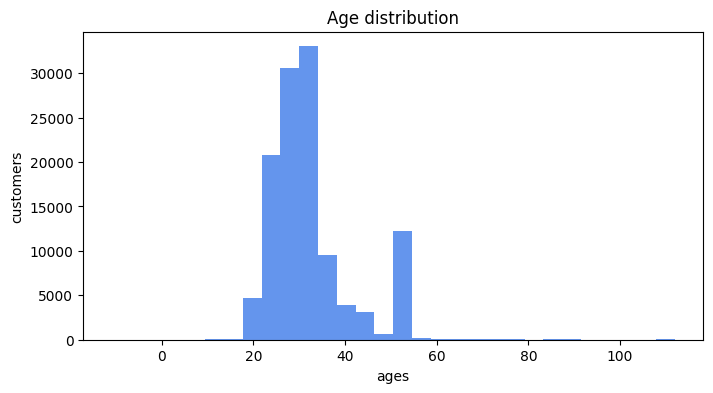

In [293]:
# Phân bổ khách hàng theo độ tuổi

plt.figure(figsize=(8, 4))
df_cus['age'].hist(bins=30, color='cornflowerblue', grid=False)
plt.xlabel('ages')
plt.ylabel('customers')
plt.title('Age distribution')
plt.show()


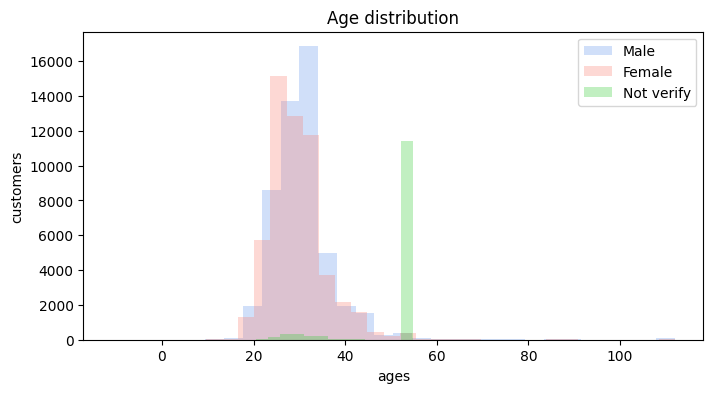

In [294]:
# Phân bổ độ tuổi theo nhóm giới tính

plt.figure(figsize=(8, 4))

# data
male_age = df_cus[df_cus['usergender'] == 'Male']['age']
female_age = df_cus[df_cus['usergender'] == 'Female']['age']
unknown_age = df_cus[df_cus['usergender'] == 'Not verify']['age']

# plot
plt.hist(male_age, bins = 30, alpha = 0.3, color = 'cornflowerblue', label = 'Male')
plt.hist(female_age, bins = 30, alpha = 0.3, color = 'salmon', label = 'Female')
plt.hist(unknown_age, bins = 30, alpha = 0.3, color = 'limegreen', label = 'Not verify')

# edit
plt.title('Age distribution')
plt.xlabel('ages')
plt.ylabel('customers')
plt.legend()
plt.show()

In [295]:
# Đánh giá chi tiết nhóm Not verify
df_gen = df_cus.groupby('usergender').agg(
    total = ('customer_id', 'count')
).reset_index().sort_values(by='total', ascending=False)

In [296]:
df_gen

,usergender,total
0,Female,55689
1,Male,50873
2,Not verify,12915


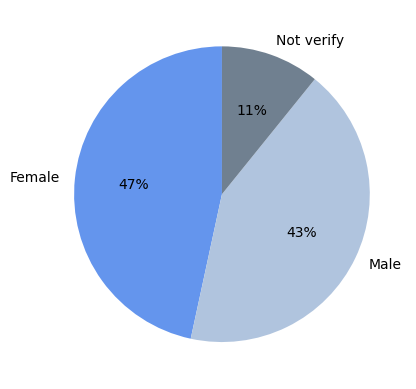

In [297]:
# Visualize

plt.pie(df_gen['total'], labels=df_gen['usergender'], colors=['cornflowerblue', 'lightsteelblue', 'slategrey'], autopct='%1.0f%%', startangle=90)
plt.show()

In [298]:
df_cus[df_cus['usergender'] == 'Not verify'].groupby('age').agg(
    number = ('customer_id', 'count')
).reset_index().sort_values(by='number', ascending=False).head(10)

,age,number
38,54,11435
13,29,139
10,26,119
15,31,114
11,27,113
16,32,106
12,28,102
14,30,101
9,25,95
18,34,94


Notes:
- Nhóm KH chưa verify tài khoản chiếm hơn 11% dẫn tới 2 trường hợp
    + Nếu họ nhập dob thì sẽ có data
    + Nếu họ không nhập thì hệ thống sẽ auto fill là 1970 -> 54 tuổi

### Age generation distribution

In [299]:
df_cus.head()

,customer_id,dob,age,usergender
0,100009,1989-02-25,35,Male
1,100493,1991-06-09,33,Male
2,100596,1989-05-18,35,Male
3,100852,1997-08-31,27,Male
4,100965,1988-09-20,36,Male


In [300]:
# Logic phân loại X , Y, Z, baby boomers -> Dựa vào năm sinh

df_cus['age_generation'] = df_cus['dob'].apply(lambda x: 'baby boomers' if x.year < 1965 
                                                        else 'gen X' if x.year < 1981 
                                                        else 'gen Y' if x.year < 1997
                                                        else 'gen Z')


In [301]:
df_gen_group = df_cus[df_cus['usergender'] != 'Not verify'].groupby('age_generation').agg(
    total = ('customer_id', 'count')
).reset_index().sort_values(by='total', ascending=False)

df_gen_group

,age_generation,total
2,gen Y,63310
3,gen Z,38401
1,gen X,4261
0,baby boomers,590


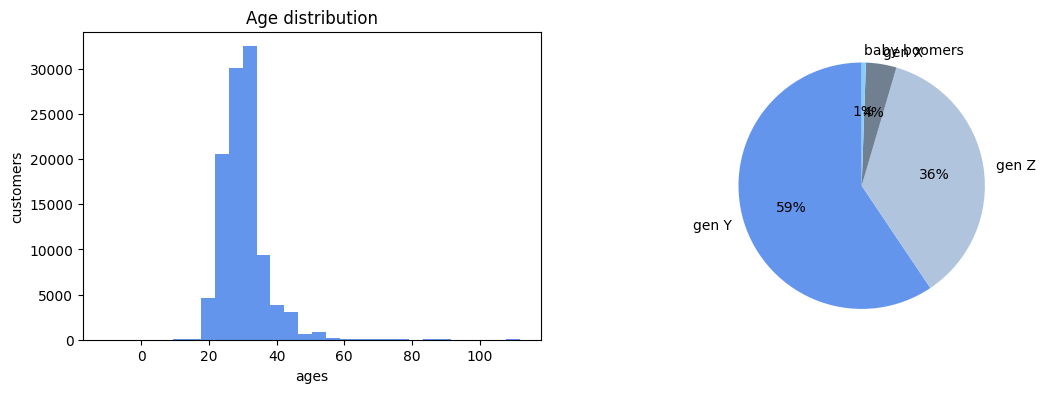

In [302]:
# Kết hợp 2 biểu đồ cùng lúc
plt.figure(figsize=(13, 4))

# plot 1
ax1 = plt.subplot(1, 2, 1)
df_cus[df_cus['usergender'] != 'Not verify']['age'].hist(bins=30, color='cornflowerblue', grid=False)
plt.xlabel('ages')
plt.ylabel('customers')
plt.title('Age distribution')

ax2 = plt.subplot(1, 2, 2)
plt.pie(df_gen_group['total'], labels=df_gen_group['age_generation'], colors=['cornflowerblue', 'lightsteelblue', 'slategrey', 'lightskyblue'], autopct='%1.0f%%', startangle=90)
plt.show()

## 3.2. Time series data -  When did customers buy ticket

### Trend by month

In [303]:
df_join_all.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,description,error_group,model,platform,age_days,age
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,Order successful,unknown,"iPhone13,1",mobile,13073,35
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,Order successful,unknown,browser,website,12239,33
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Male,1989-05-18,unknown,Order successful,unknown,unknown,mobile,12991,35
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Male,1997-08-31,direct discount,Order successful,unknown,devicemodel,mobile,9964,27
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Male,1988-09-20,direct discount,Order successful,unknown,devicemodel,mobile,13231,36


In [304]:
df_join_all['month'] = pd.to_datetime(df_join_all['time']).dt.month
df_join_all['name_day'] = pd.to_datetime(df_join_all['time']).dt.day_name()
df_join_all['hour'] = pd.to_datetime(df_join_all['time']).dt.hour
df_join_all['year_month'] = pd.to_datetime(df_join_all['time']).dt.strftime('%Y-%m')

In [305]:
df_time_month = df_join_all.groupby('year_month').agg(
    total_ticket = ('ticket_id', 'count')
).reset_index()

df_time_month.head()

,year_month,total_ticket
0,2019-01,2019
1,2019-02,1626
2,2019-03,1004
3,2019-04,4069
4,2019-05,4430


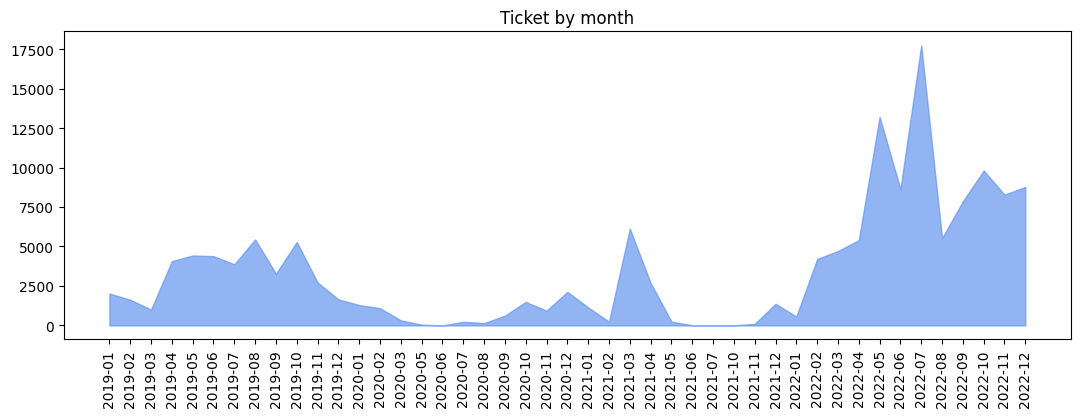

In [306]:
# Vẽ biểu đồ miền theo tháng
plt.figure(figsize=(13, 4))

plt.fill_between(df_time_month['year_month'], df_time_month['total_ticket'], color = 'cornflowerblue', alpha = 0.7)
plt.xticks(rotation = 90)
plt.title('Ticket by month')
plt.show()

* Note: Không đủ các tháng -> Cần tạo bảng dimension time để join lại với data ticket và vẽ lại chart

In [307]:
# Tạo bảng dimension thời gian:

# Xác định khoảng thời gian
start_date = '2019-01-01'
end_date = '2022-12-31'

# Tạo ra range thời gian từ 2 mốc start và end
date_range = pd.date_range(start=start_date, end=end_date, freq='MS')

# Lấy ra list phần tử thời gian tương ứng:
list_month = date_range.month
list_month_name = date_range.strftime('%B')
list_year = date_range.year
list_year_month = date_range.strftime('%Y-%m')

# # Khởi tạo dataframe
dim_time = pd.DataFrame({
    'month_number': list_month,
    'month_name': list_month_name,
    'year': list_year,
    'year_month': list_year_month
})

In [308]:
# JOIN với bảng df_join_all để có đủ data thời gian

df_time_month_dim = pd.merge(dim_time, df_join_all, how='left', on='year_month').groupby(['year_month']).agg(
    total_ticket = ('ticket_id', 'count')
).reset_index()

In [309]:
df_time_month_dim.replace(0, np.nan, inplace=True)

In [310]:
df_time_month_dim

,year_month,total_ticket
0,2019-01,2019.0
1,2019-02,1626.0
2,2019-03,1004.0
3,2019-04,4069.0
4,2019-05,4430.0
5,2019-06,4387.0
6,2019-07,3872.0
7,2019-08,5444.0
8,2019-09,3278.0
9,2019-10,5284.0


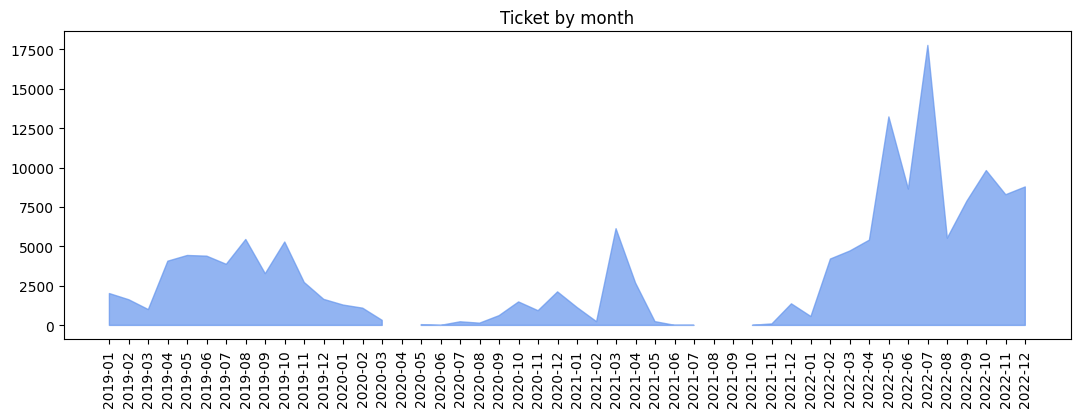

In [311]:
# Vẽ biểu đồ miền theo tháng
plt.figure(figsize=(13, 4))

plt.fill_between(df_time_month_dim['year_month'], df_time_month_dim['total_ticket'], color = 'cornflowerblue', alpha = 0.7)
plt.xticks(rotation = 90)
plt.title('Ticket by month')
plt.show()

### Trend by week days

In [312]:
# Thống kê theo ngày trong tuần
df_week_day = df_join_all.groupby('name_day').agg(
    total_ticket = ('ticket_id', 'count')
).reset_index()

df_week_day

,name_day,total_ticket
0,Friday,26438
1,Monday,16702
2,Saturday,34450
3,Sunday,26960
4,Thursday,19101
5,Tuesday,14793
6,Wednesday,16281


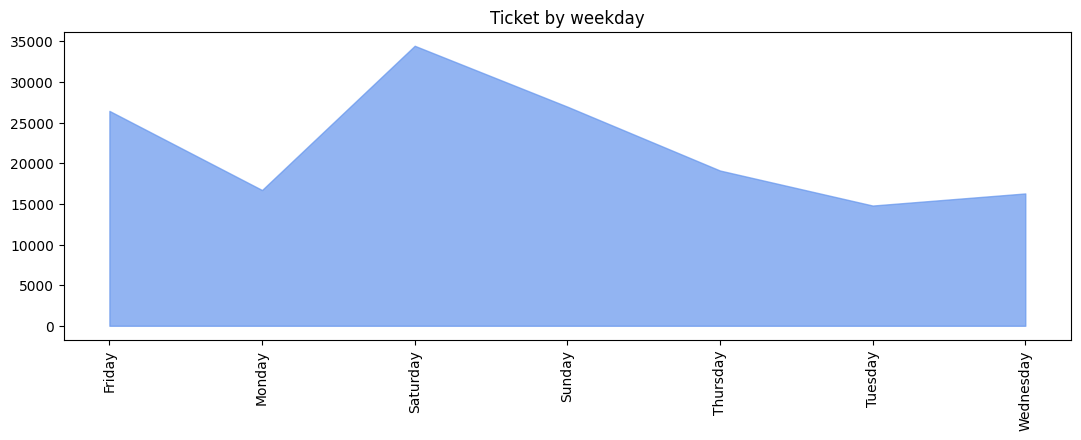

In [313]:
# Vẽ biểu đồ miền theo ngày
plt.figure(figsize=(13, 4))

plt.fill_between(df_week_day['name_day'], df_week_day['total_ticket'], color = 'cornflowerblue', alpha = 0.7)
plt.xticks(rotation = 90)
plt.title('Ticket by weekday')
plt.show()

In [314]:
# Định nghĩa thứ tự của các ngày trong tuần
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Sắp xếp theo thứ tự các ngày trong tuần
df_week_day['day_order'] = pd.Categorical(df_week_day['name_day'], categories=week_order, ordered=True)
df_week_day.sort_values('day_order', inplace=True)

In [315]:
df_week_day

,name_day,total_ticket,day_order
1,Monday,16702,Monday
5,Tuesday,14793,Tuesday
6,Wednesday,16281,Wednesday
4,Thursday,19101,Thursday
0,Friday,26438,Friday
2,Saturday,34450,Saturday
3,Sunday,26960,Sunday


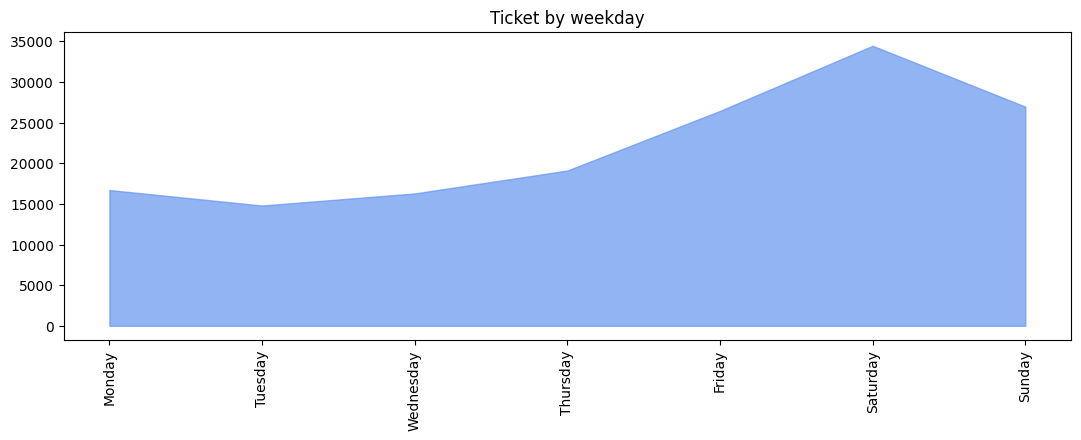

In [316]:
# Vẽ biểu đồ miền theo ngày
plt.figure(figsize=(13, 4))

plt.fill_between(df_week_day['name_day'], df_week_day['total_ticket'], color = 'cornflowerblue', alpha = 0.7)
plt.xticks(rotation = 90)
plt.title('Ticket by weekday')
plt.show()

### Trend by hour

In [317]:
# Thống kê theo giờ
df_hour = df_join_all.groupby('hour').agg(
    total_ticket = ('ticket_id', 'count')
).reset_index()

df_hour

,hour,total_ticket
0,0,2352
1,1,964
2,2,398
3,3,159
4,4,74
5,5,146
6,6,536
7,7,1473
8,8,3865
9,9,7111


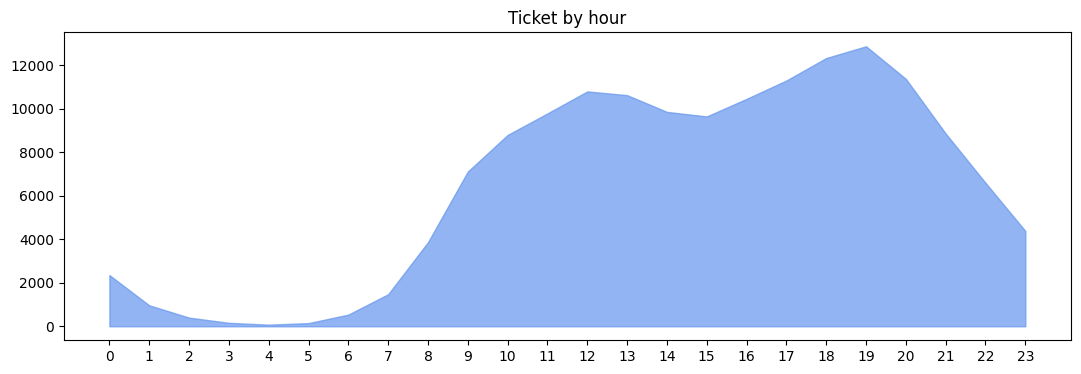

In [318]:
# Vẽ biểu đồ miền theo từng giờ
plt.figure(figsize=(13, 4))

plt.fill_between(df_hour['hour'], df_hour['total_ticket'], color = 'cornflowerblue', alpha = 0.7)
x_values = [i for i in range(24)]
plt.xticks(x_values)
plt.title('Ticket by hour')
plt.show()

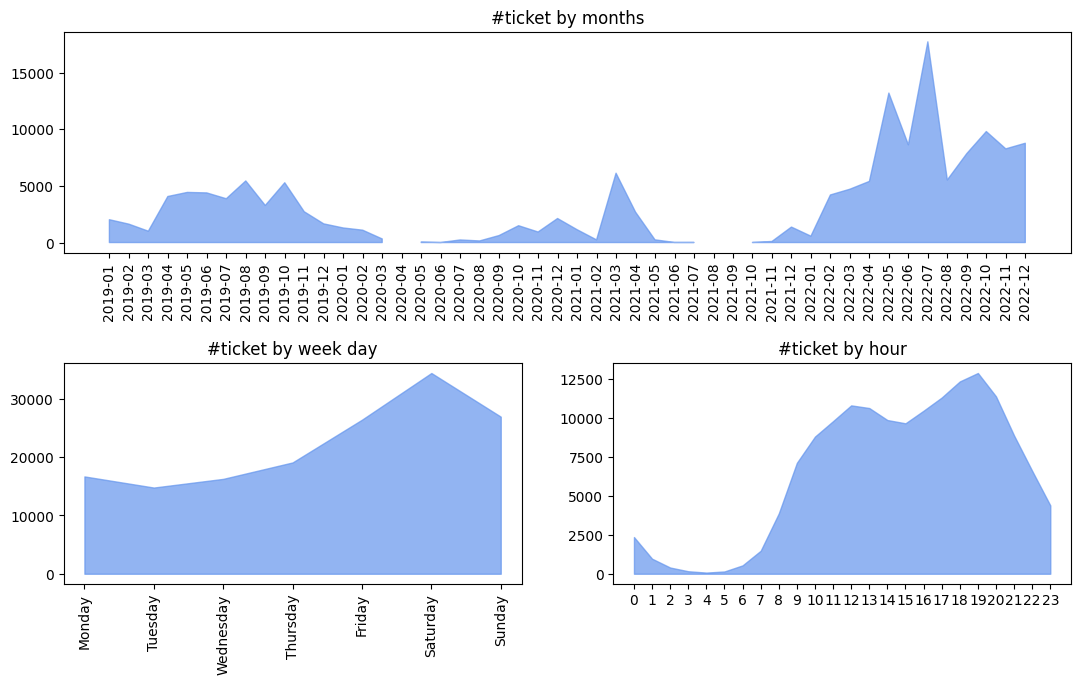

In [319]:
# Vẽ chung trên 1 frame
plt.figure(figsize=(13, 8))

# chart 1: tháng
ax1 = plt.subplot(2, 1, 1)
plt.fill_between(df_time_month_dim['year_month'], df_time_month_dim['total_ticket'], color = 'cornflowerblue', alpha=0.7)
plt.title('#ticket by months')
plt.xticks(rotation=90)

# chart 2: ngày
ax2 = plt.subplot(2, 2, 3)
plt.fill_between(df_week_day['name_day'], df_week_day['total_ticket'], color = 'cornflowerblue', alpha=0.7)
plt.title('#ticket by week day')
plt.xticks(rotation=90)

# chart 3: giờ
ax3 = plt.subplot(2, 2, 4)
plt.fill_between(df_hour['hour'], df_hour['total_ticket'], color = 'cornflowerblue', alpha=0.7)
x_values = [i for i in range(24)]
plt.xticks(x_values)
plt.title('#ticket by hour')

plt.subplots_adjust(hspace = 0.5, top=0.8)

## 3.3. Factors related to the customer's purchasing process

### Payment platform

In [320]:
df_join_all.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,description,error_group,model,platform,age_days,age,month,name_day,hour,year_month
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,Order successful,unknown,"iPhone13,1",mobile,13073,35,7,Friday,17,2022-07
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,Order successful,unknown,browser,website,12239,33,7,Friday,20,2022-07
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Male,1989-05-18,unknown,Order successful,unknown,unknown,mobile,12991,35,7,Saturday,11,2022-07
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Male,1997-08-31,direct discount,Order successful,unknown,devicemodel,mobile,9964,27,7,Monday,22,2022-07
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Male,1988-09-20,direct discount,Order successful,unknown,devicemodel,mobile,13231,36,7,Sunday,18,2022-07


In [321]:
df_platform = df_join_all[df_join_all['platform'] != 'unknown'].groupby('platform').agg(
    total_ticket = ('ticket_id', 'count')
).reset_index()

df_platform

,platform,total_ticket
0,mobile,138136
1,website,16511


Text(0.5, 1.0, '#ticket by platform')

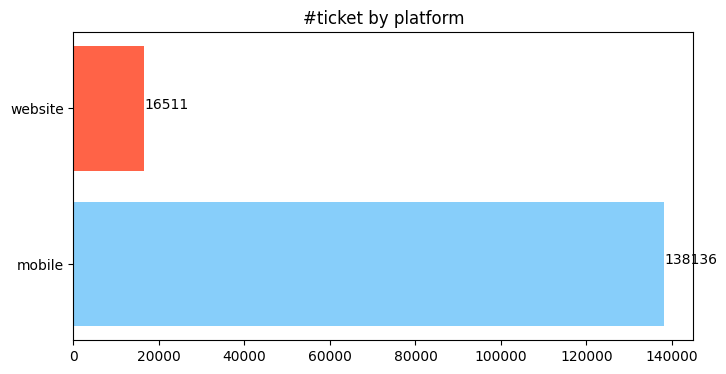

In [322]:
# Biểu đồ cột ngang :
plt.figure(figsize=(8, 4))

plt.barh(
    df_platform['platform'], df_platform['total_ticket'],
    color = df_platform['platform'].replace({ 'mobile': 'lightskyblue',  'website': 'tomato'})
)

for index,value in enumerate(df_platform['total_ticket']):
    plt.text(value,index,str(value))

plt.title('#ticket by platform')

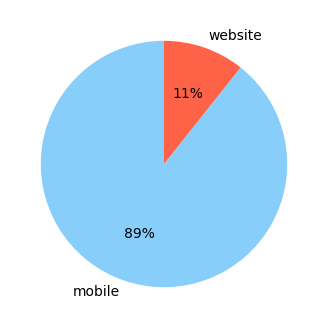

In [323]:
plt.figure(figsize=(6, 4))
plt.pie(df_platform['total_ticket'], labels = df_platform['platform'], colors = df_platform['platform'].replace({ 'mobile': 'lightskyblue',  'website': 'tomato'}), autopct='%1.0f%%', startangle=90)
plt.show()

In [324]:
# Theo thời gian
df_platform_time = df_join_all[df_join_all['platform'] != 'unknown'].groupby(['year_month', 'platform']).agg(
    total_ticket = ('ticket_id', 'count')
).sort_values(by='year_month', ascending=True).reset_index()

df_platform_time.head()

,year_month,platform,total_ticket
0,2019-01,mobile,2019
1,2019-02,mobile,1626
2,2019-03,mobile,1004
3,2019-04,mobile,4069
4,2019-05,mobile,4430


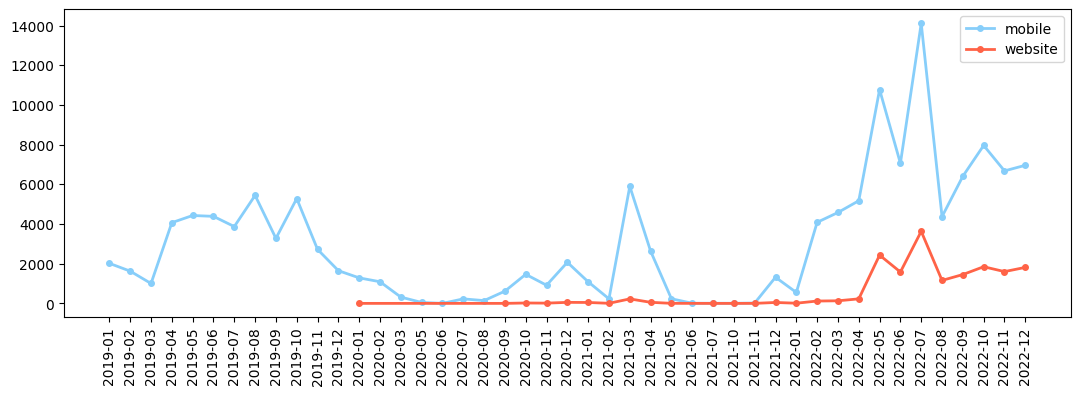

In [325]:
# Vẽ biểu đồ line chart
plt.figure(figsize=(13, 4))

df_mobile_line = df_platform_time[df_platform_time['platform'] == 'mobile']
plt.plot(df_mobile_line['year_month'], df_mobile_line['total_ticket'], label='mobile', marker='o', color='lightskyblue', linewidth=2, markersize=4)

df_web_line = df_platform_time[df_platform_time['platform'] == 'website']
plt.plot(df_web_line['year_month'], df_web_line['total_ticket'], label='website', marker='o', color='tomato', linewidth=2, markersize=4)

plt.legend()
plt.xticks(rotation=90)
plt.show()

### OS version

In [326]:
df_join_all.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,description,error_group,model,platform,age_days,age,month,name_day,hour,year_month
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,Order successful,unknown,"iPhone13,1",mobile,13073,35,7,Friday,17,2022-07
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,Order successful,unknown,browser,website,12239,33,7,Friday,20,2022-07
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Male,1989-05-18,unknown,Order successful,unknown,unknown,mobile,12991,35,7,Saturday,11,2022-07
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Male,1997-08-31,direct discount,Order successful,unknown,devicemodel,mobile,9964,27,7,Monday,22,2022-07
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Male,1988-09-20,direct discount,Order successful,unknown,devicemodel,mobile,13231,36,7,Sunday,18,2022-07


In [327]:
# Phân loại thiết bị thành các nhóm: android_others, ios, unknown, browser
df_join_all['os_version'] = df_join_all['model'].apply(lambda x: 'ios' if ('iPhone' in x or 'iPod' in x)
                                                       else 'browser' if x == 'browser'
                                                       else 'unknown' if ('devicemodel' in x or 'unknown' in x)
                                                       else 'android & other')

In [328]:
df_join_all['os_version'].unique()

array(['ios', 'browser', 'unknown', 'android & other'], dtype=object)

In [329]:
# Groupby để thống kê
df_os = df_join_all.groupby('os_version').agg(
    total_ticket = ('ticket_id', 'count')
).reset_index().sort_values(by='total_ticket', ascending=True)

df_os

,os_version,total_ticket
1,browser,13377
0,android & other,21092
2,ios,51402
3,unknown,68854


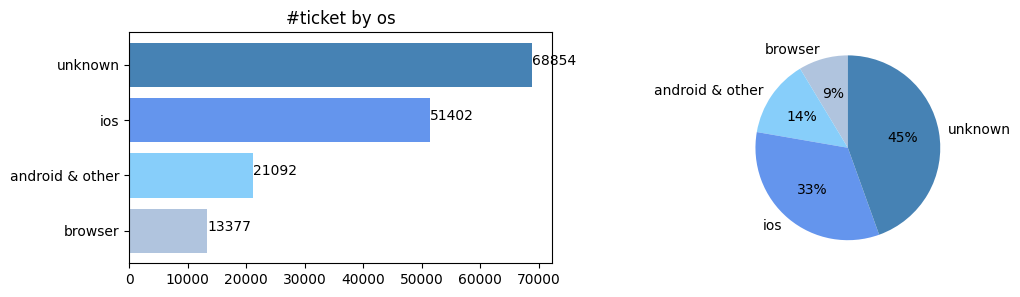

In [330]:
# Biểu đồ cột ngang
plt.figure(figsize=(12, 3))

ax1 = plt.subplot(1,2,1)
plt.barh(
    df_os['os_version'], df_os['total_ticket'],
    color = df_os['os_version'].replace({ 'browser': 'lightsteelblue',  'android & other': 'lightskyblue', 'ios': 'cornflowerblue', 'unknown': 'steelblue'})
)

for index,value in enumerate(df_os['total_ticket']):
    plt.text(value,index,str(value))
plt.title('#ticket by os')

ax2 = plt.subplot(1,2,2)
plt.pie(df_os['total_ticket'], labels= df_os['os_version'],
        colors=df_os['os_version'].replace({ 'browser': 'lightsteelblue',  'android & other': 'lightskyblue', 'ios': 'cornflowerblue', 'unknown': 'steelblue'}),
        autopct='%1.0f%%',
        startangle=90)
plt.show()

In [331]:
# Theo thời gian
df_os_time = df_join_all.groupby(['year_month', 'os_version']).agg(
    total_ticket = ('ticket_id', 'count')
).sort_values(by='year_month').reset_index()

df_os_time.head()

,year_month,os_version,total_ticket
0,2019-01,android & other,713
1,2019-01,ios,1233
2,2019-01,unknown,73
3,2019-02,android & other,542
4,2019-02,ios,1074


In [332]:
# Xử lý data dạng PIVOT để vẽ biểu đồ miền
df_os_time = df_join_all.pivot_table(index='year_month', columns='os_version', aggfunc='count', values='ticket_id').reset_index()

df_os_time.head(10)

os_version,year_month,android & other,browser,ios,unknown
0,2019-01,713.0,NaN,1233.0,73.0
1,2019-02,542.0,NaN,1074.0,10.0
2,2019-03,371.0,NaN,631.0,2.0
3,2019-04,1519.0,NaN,2541.0,9.0
4,2019-05,1601.0,NaN,2826.0,3.0
5,2019-06,1575.0,NaN,2808.0,4.0
6,2019-07,1373.0,NaN,2499.0,NaN
7,2019-08,1797.0,NaN,3642.0,5.0
8,2019-09,1122.0,NaN,2151.0,5.0
9,2019-10,1964.0,NaN,3313.0,7.0


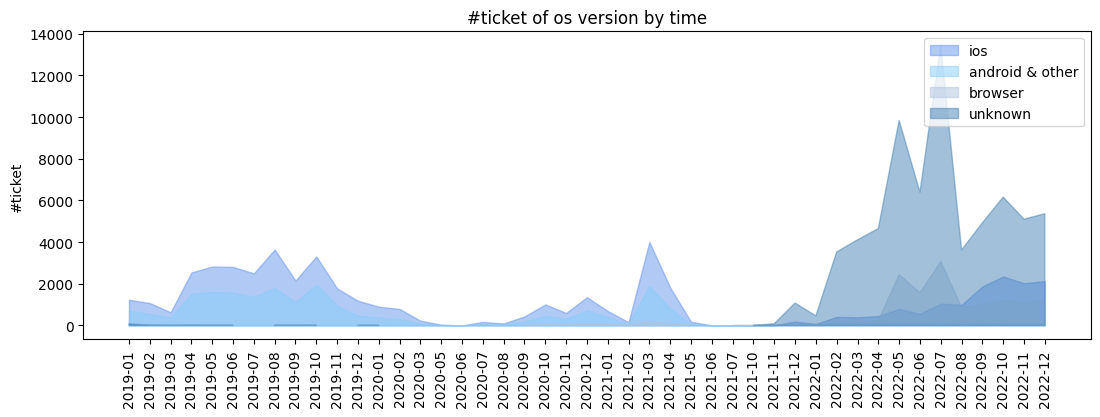

In [333]:
# Vẽ biểu đồ miền theo thời gian
plt.figure(figsize=(13, 4))
plt.fill_between(df_os_time['year_month'], df_os_time['ios'], color='cornflowerblue', alpha=0.5, label='ios')
plt.fill_between(df_os_time['year_month'], df_os_time['android & other'], color='lightskyblue', alpha=0.5, label='android & other')
plt.fill_between(df_os_time['year_month'], df_os_time['browser'], color='lightsteelblue', alpha=0.5, label='browser')
plt.fill_between(df_os_time['year_month'], df_os_time['unknown'], color='steelblue', alpha=0.5, label='unknown')

# Hiển thị biểu đồ
plt.title('#ticket of os version by time')

plt.ylabel('#ticket')
plt.legend(loc = 'upper right')
plt.xticks(rotation=90)
plt.show()

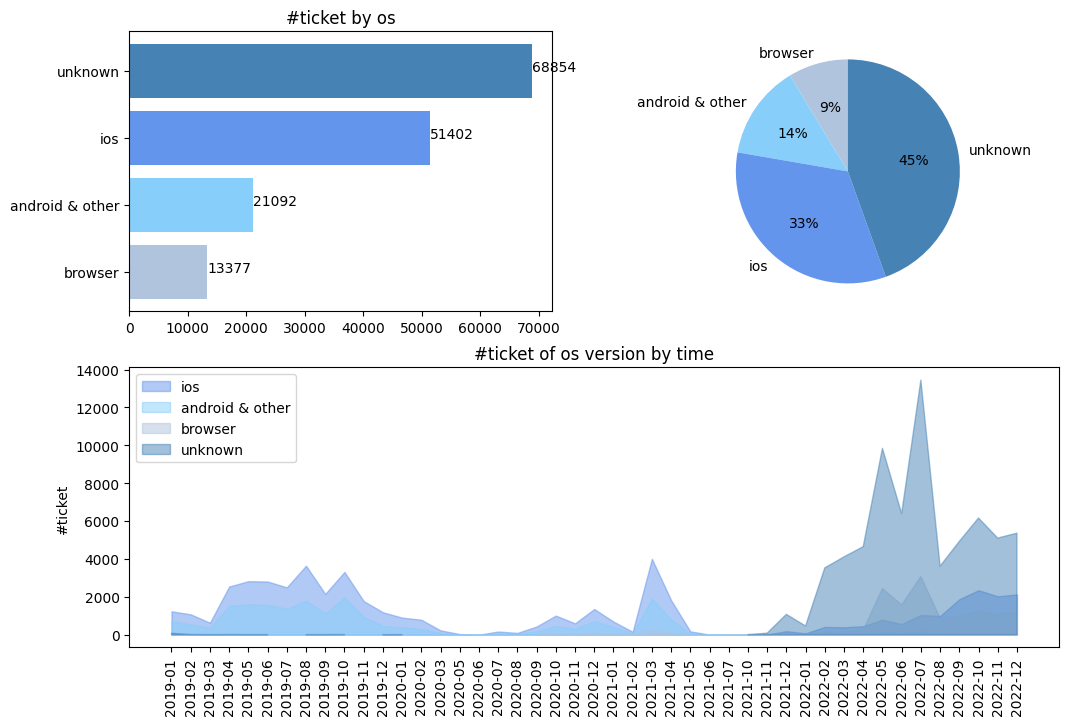

In [334]:
# Biểu đồ cột ngang
plt.figure(figsize=(12, 8))

ax1 = plt.subplot(2, 2, 1)
plt.barh(
    df_os['os_version'], df_os['total_ticket'],
    color = df_os['os_version'].replace({ 'browser': 'lightsteelblue',  'android & other': 'lightskyblue', 'ios': 'cornflowerblue', 'unknown': 'steelblue'})
)

for index,value in enumerate(df_os['total_ticket']):
    plt.text(value,index,str(value))
plt.title('#ticket by os')

ax2 = plt.subplot(2, 2, 2)
plt.pie(df_os['total_ticket'], labels= df_os['os_version'],
        colors=df_os['os_version'].replace({ 'browser': 'lightsteelblue',  'android & other': 'lightskyblue', 'ios': 'cornflowerblue', 'unknown': 'steelblue'}),
        autopct='%1.0f%%',
        startangle=90)

ax3 = plt.subplot(2, 1, 2)
plt.fill_between(df_os_time['year_month'], df_os_time['ios'], color='cornflowerblue', alpha=0.5, label='ios')
plt.fill_between(df_os_time['year_month'], df_os_time['android & other'], color='lightskyblue', alpha=0.5, label='android & other')
plt.fill_between(df_os_time['year_month'], df_os_time['browser'], color='lightsteelblue', alpha=0.5, label='browser')
plt.fill_between(df_os_time['year_month'], df_os_time['unknown'], color='steelblue', alpha=0.5, label='unknown')

# Hiển thị biểu đồ
plt.title('#ticket of os version by time')
plt.ylabel('#ticket')
plt.legend(loc = 'upper left')
plt.xticks(rotation=90)
plt.show()

### Payment method

In [335]:
df_join_all.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,description,error_group,model,platform,age_days,age,month,name_day,hour,year_month,os_version
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,Order successful,unknown,"iPhone13,1",mobile,13073,35,7,Friday,17,2022-07,ios
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,Order successful,unknown,browser,website,12239,33,7,Friday,20,2022-07,browser
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Male,1989-05-18,unknown,Order successful,unknown,unknown,mobile,12991,35,7,Saturday,11,2022-07,unknown
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Male,1997-08-31,direct discount,Order successful,unknown,devicemodel,mobile,9964,27,7,Monday,22,2022-07,unknown
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Male,1988-09-20,direct discount,Order successful,unknown,devicemodel,mobile,13231,36,7,Sunday,18,2022-07,unknown


In [336]:
df_method = df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['paying_method'] != 'other')].groupby('paying_method').agg(
    total_ticket = ('ticket_id', 'count')
).sort_values(by='total_ticket').reset_index()

df_method

,paying_method,total_ticket
0,debit card,11395
1,credit card,15408
2,bank account,42057
3,money in app,64817


In [337]:
# Xử lý data dạng PIVOT để vẽ biểu đồ miền
df_method_time = (
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['paying_method'] != 'other')]
    .pivot_table(index='year_month', columns = 'paying_method', aggfunc='count', values='ticket_id')
    .reset_index()
)
df_method_time.head()

paying_method,year_month,bank account,credit card,debit card,money in app
0,2019-01,487.0,336.0,93.0,443.0
1,2019-02,484.0,370.0,93.0,480.0
2,2019-03,304.0,225.0,74.0,263.0
3,2019-04,1050.0,705.0,189.0,1246.0
4,2019-05,1092.0,903.0,212.0,1410.0


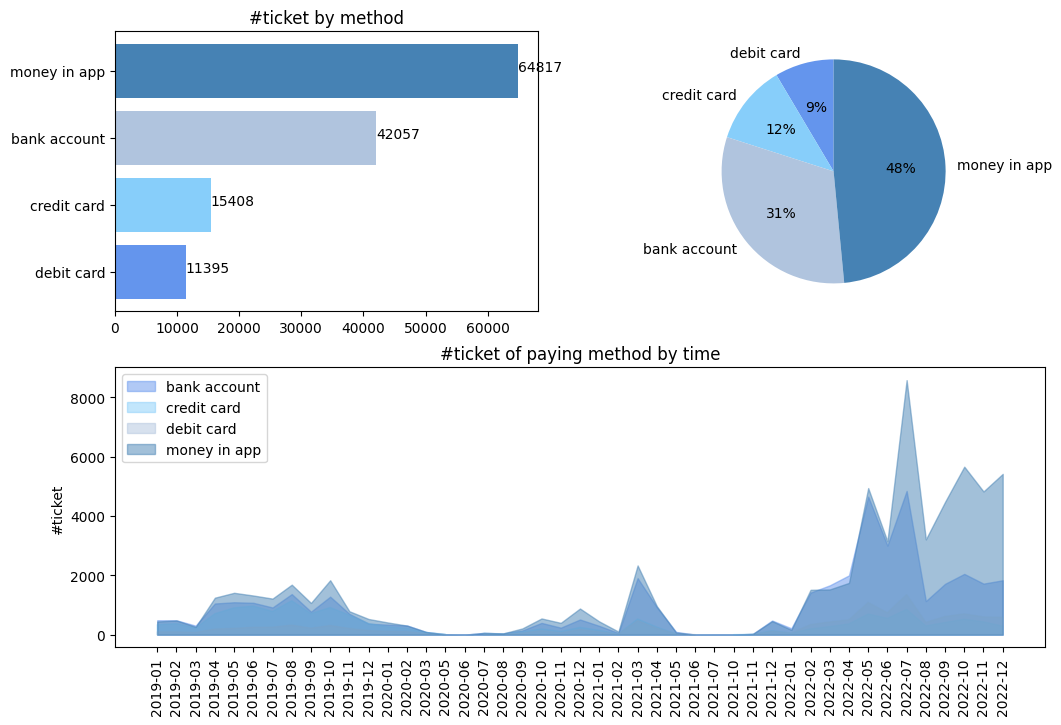

In [338]:
# Biểu đồ cột ngang
plt.figure(figsize=(12, 8))

ax1 = plt.subplot(2, 2, 1)
plt.barh(
    df_method['paying_method'], df_method['total_ticket'],
    color = df_method['paying_method'].replace({'bank account': 'lightsteelblue', 'credit card': 'lightskyblue', 'debit card': 'cornflowerblue', 'money in app': 'steelblue'})
)

for index,value in enumerate(df_method['total_ticket']):
    plt.text(value,index,str(value))
plt.title('#ticket by method')

ax2 = plt.subplot(2, 2, 2)
plt.pie(df_method['total_ticket'], labels= df_method['paying_method'],
        colors=df_method['paying_method'].replace({'bank account': 'lightsteelblue', 'credit card': 'lightskyblue', 'debit card': 'cornflowerblue', 'money in app': 'steelblue'}),
        autopct='%1.0f%%',
        startangle=90)

ax3 = plt.subplot(2, 1, 2)
plt.fill_between(df_method_time['year_month'], df_method_time['bank account'], color='cornflowerblue', alpha=0.5, label='bank account')
plt.fill_between(df_method_time['year_month'], df_method_time['credit card'], color='lightskyblue', alpha=0.5, label='credit card')
plt.fill_between(df_method_time['year_month'], df_method_time['debit card'], color='lightsteelblue', alpha=0.5, label='debit card')
plt.fill_between(df_method_time['year_month'], df_method_time['money in app'], color='steelblue', alpha=0.5, label='money in app')

# Hiển thị biểu đồ
plt.title('#ticket of paying method by time')
plt.ylabel('#ticket')
plt.legend(loc = 'upper left')
plt.xticks(rotation=90)
plt.show()

In [339]:
# Biểu đồ miền 100%
df_method_time = (
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['paying_method'] != 'other')]
    .pivot_table(index='year_month', columns = 'paying_method', aggfunc='count', values='ticket_id')
    .reset_index()
)

df_method_time_pct = df_method_time.copy()

df_method_time_pct = df_method_time.fillna(0)

df_method_time_pct['total'] = df_method_time_pct.iloc[:, 1:].sum(axis=1)

for i in df_method_time.columns[1:5]:
    df_method_time_pct[i+'_pct'] = df_method_time_pct[i] / df_method_time_pct['total']

df_method_time_pct.head(10)

paying_method,year_month,bank account,credit card,debit card,money in app,total,bank account_pct,credit card_pct,debit card_pct,money in app_pct
0,2019-01,487.0,336.0,93.0,443.0,1359.0,0.358352,0.247241,0.068433,0.325975
1,2019-02,484.0,370.0,93.0,480.0,1427.0,0.339173,0.259285,0.065172,0.336370
2,2019-03,304.0,225.0,74.0,263.0,866.0,0.351039,0.259815,0.085450,0.303695
3,2019-04,1050.0,705.0,189.0,1246.0,3190.0,0.329154,0.221003,0.059248,0.390596
4,2019-05,1092.0,903.0,212.0,1410.0,3617.0,0.301908,0.249654,0.058612,0.389826
5,2019-06,1074.0,962.0,249.0,1319.0,3604.0,0.298002,0.266926,0.069090,0.365982
6,2019-07,916.0,782.0,252.0,1215.0,3165.0,0.289415,0.247077,0.079621,0.383886
7,2019-08,1367.0,1142.0,321.0,1684.0,4514.0,0.302836,0.252991,0.071112,0.373062
8,2019-09,774.0,711.0,219.0,1068.0,2772.0,0.279221,0.256494,0.079004,0.385281
9,2019-10,1280.0,914.0,309.0,1833.0,4336.0,0.295203,0.210793,0.071264,0.422740


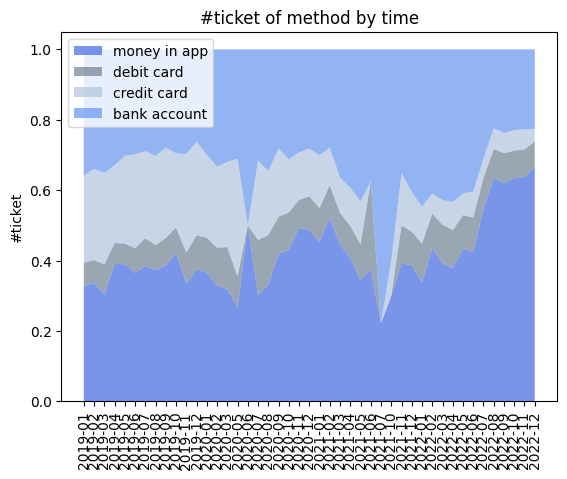

In [340]:
# Vẽ biểu đồ miền 100%
plt.stackplot(df_method_time_pct['year_month'], df_method_time_pct["money in app_pct"],  df_method_time_pct['debit card_pct'], df_method_time_pct['credit card_pct'], df_method_time_pct['bank account_pct']
              , labels=['money in app', 'debit card', 'credit card', 'bank account'], colors=['royalblue', 'slategrey', 'lightsteelblue', 'cornflowerblue'], alpha=0.7)

plt.title('#ticket of method by time')
plt.ylabel('#ticket')
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.show()

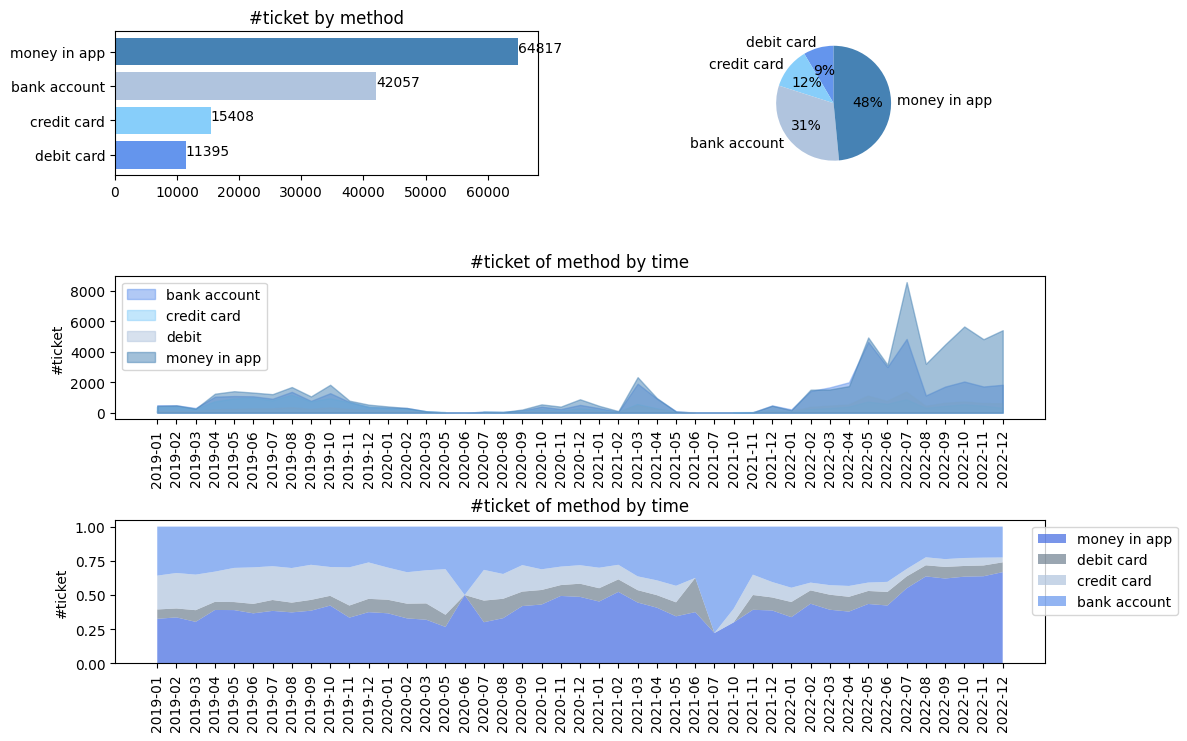

In [341]:
# biểu diễn chung 1 frame
plt.figure(figsize=(12, 8))

ax1 = plt.subplot(3,2,1)
plt.barh(
    df_method['paying_method'], df_method['total_ticket'],
    color = df_method['paying_method'].replace({ 'bank account': 'lightsteelblue',  'credit card': 'lightskyblue', 'debit card': 'cornflowerblue', 'money in app': 'steelblue'})
)

for index,value in enumerate(df_method['total_ticket']):
    plt.text(value,index,str(value))
plt.title('#ticket by method')

ax2 = plt.subplot(3,2,2)
plt.pie(df_method['total_ticket'], labels= df_method['paying_method'],
        colors=df_method['paying_method'].replace({ 'bank account': 'lightsteelblue',  'credit card': 'lightskyblue', 'debit card': 'cornflowerblue', 'money in app': 'steelblue'}),
        autopct='%1.0f%%',
        startangle=90)

ax3 = plt.subplot(3,1,2)
plt.fill_between(df_method_time['year_month'], df_method_time['bank account'], color='cornflowerblue', alpha=0.5, label='bank account')
plt.fill_between(df_method_time['year_month'], df_method_time['credit card'], color='lightskyblue', alpha=0.5, label='credit card')
plt.fill_between(df_method_time['year_month'], df_method_time['debit card'], color='lightsteelblue', alpha=0.5, label='debit')
plt.fill_between(df_method_time['year_month'], df_method_time['money in app'], color='steelblue', alpha=0.5, label='money in app')

plt.title('#ticket of method by time')
plt.ylabel('#ticket')
plt.legend(loc='upper left')
plt.xticks(rotation=90)

ax4 = plt.subplot(3,1,3)
plt.stackplot(df_method_time_pct['year_month'], df_method_time_pct['money in app_pct'],  df_method_time_pct['debit card_pct'], df_method_time_pct['credit card_pct'], df_method_time_pct['bank account_pct']
              , labels=['money in app', 'debit card', 'credit card', 'bank account'], colors=['royalblue', 'slategrey', 'lightsteelblue', 'cornflowerblue'], alpha=0.7)
plt.title('#ticket of method by time')
plt.ylabel('#ticket')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=90)

plt.subplots_adjust(hspace = 0.7, top = 0.9)

### Promotion

In [342]:
df_join_all.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,description,error_group,model,platform,age_days,age,month,name_day,hour,year_month,os_version
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,Order successful,unknown,"iPhone13,1",mobile,13073,35,7,Friday,17,2022-07,ios
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,Order successful,unknown,browser,website,12239,33,7,Friday,20,2022-07,browser
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Male,1989-05-18,unknown,Order successful,unknown,unknown,mobile,12991,35,7,Saturday,11,2022-07,unknown
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Male,1997-08-31,direct discount,Order successful,unknown,devicemodel,mobile,9964,27,7,Monday,22,2022-07,unknown
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Male,1988-09-20,direct discount,Order successful,unknown,devicemodel,mobile,13231,36,7,Sunday,18,2022-07,unknown


In [343]:
df_join_all['campaign_type'].unique()

array(['direct discount', 'unknown', 'voucher', 'reward point'],
      dtype=object)

In [344]:
df_join_all['type'] = df_join_all['campaign_type'].apply(lambda x: 'non-promotion' if x == 'unknown' else 'promotion')
df_join_all.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,description,error_group,model,platform,age_days,age,month,name_day,hour,year_month,os_version,type
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,Order successful,unknown,"iPhone13,1",mobile,13073,35,7,Friday,17,2022-07,ios,promotion
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,Order successful,unknown,browser,website,12239,33,7,Friday,20,2022-07,browser,promotion
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Male,1989-05-18,unknown,Order successful,unknown,unknown,mobile,12991,35,7,Saturday,11,2022-07,unknown,non-promotion
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Male,1997-08-31,direct discount,Order successful,unknown,devicemodel,mobile,9964,27,7,Monday,22,2022-07,unknown,promotion
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Male,1988-09-20,direct discount,Order successful,unknown,devicemodel,mobile,13231,36,7,Sunday,18,2022-07,unknown,promotion


In [345]:
df_type = (
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['paying_method'] != 'other')].groupby('type')
    .agg(total_ticket = ('ticket_id', 'count'))
    .sort_values(by='total_ticket').reset_index()
)

df_type

,type,total_ticket
0,non-promotion,55155
1,promotion,78522


In [346]:
df_type_time = (
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['paying_method'] != 'other')]
    .pivot_table(index='year_month', columns='type', aggfunc='count', values='ticket_id')
    .reset_index()
)

df_type_time.head()

type,year_month,non-promotion,promotion
0,2019-01,517.0,842.0
1,2019-02,1335.0,92.0
2,2019-03,835.0,31.0
3,2019-04,1699.0,1491.0
4,2019-05,1564.0,2053.0


In [347]:
df_type_time_pct = df_type_time.copy()

df_type_time_pct = df_type_time_pct.fillna(0)

df_type_time_pct['total'] = df_type_time_pct.iloc[:, 1:].sum(axis=1)

for i in df_type_time_pct.columns[1:3]:
    df_type_time_pct[i + '_pct'] = df_type_time_pct[i] / df_type_time_pct['total'] 

df_type_time_pct.head()

type,year_month,non-promotion,promotion,total,non-promotion_pct,promotion_pct
0,2019-01,517.0,842.0,1359.0,0.380427,0.619573
1,2019-02,1335.0,92.0,1427.0,0.935529,0.064471
2,2019-03,835.0,31.0,866.0,0.964203,0.035797
3,2019-04,1699.0,1491.0,3190.0,0.532602,0.467398
4,2019-05,1564.0,2053.0,3617.0,0.432403,0.567597


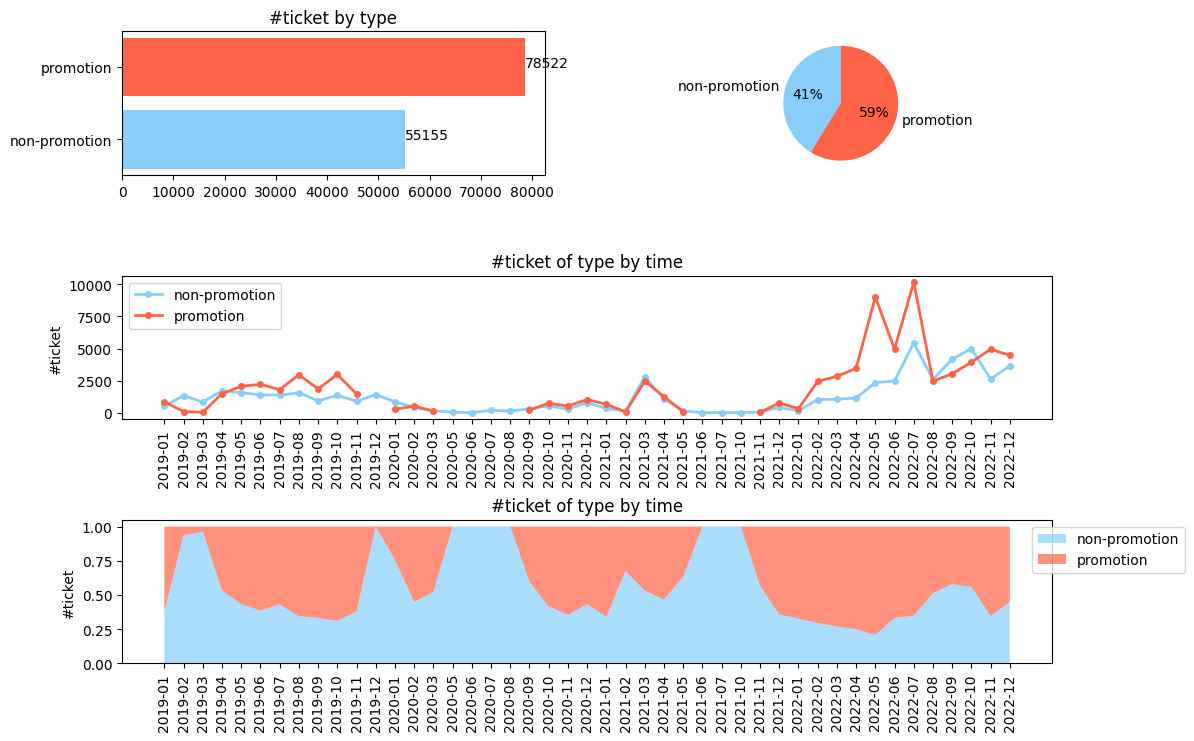

In [348]:
# Biểu diễn chung 1 frame
plt.figure(figsize=(12, 8))

ax1 = plt.subplot(3, 2, 1)
plt.barh(
    df_type['type'], df_type['total_ticket'],
    color = df_type['type'].replace({'non-promotion': 'lightskyblue', 'promotion': 'tomato'})
)

for index,value in enumerate(df_type['total_ticket']):
    plt.text(value,index,str(value))
plt.title('#ticket by type')

ax2 = plt.subplot(3,2,2)
plt.pie(df_type['total_ticket'], labels= df_type['type'],
        colors = df_type['type'].replace({'non-promotion': 'lightskyblue', 'promotion': 'tomato'}),
        autopct='%1.0f%%',
        startangle=90)

ax3 = plt.subplot(3,1,2)
plt.plot(df_type_time['year_month'], df_type_time['non-promotion'], label='non-promotion', marker='o', color='lightskyblue', linewidth=2, markersize=4)
plt.plot(df_type_time['year_month'], df_type_time['promotion'], label='promotion', marker='o', color='tomato', linewidth=2, markersize=4)
plt.title('#ticket of type by time')
plt.ylabel('#ticket')
plt.legend(loc='upper left')
plt.xticks(rotation=90)

ax4 = plt.subplot(3,1,3)
plt.stackplot(df_type_time_pct['year_month'], df_type_time_pct['non-promotion_pct'], df_type_time_pct['promotion_pct']
              , labels=['non-promotion', 'promotion'], colors=['lightskyblue', 'tomato'], alpha=0.7)
plt.title('#ticket of type by time')
plt.ylabel('#ticket')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=90)

plt.subplots_adjust(hspace = 0.7, top = 0.9)

### Which movies they watched?

In [349]:
df_movie = (
    df_join_all[df_join_all['status_id'] == 1]
    .groupby('movie_name')
    .agg(total_ticket = ('ticket_id', 'count'),
         total_customer = ('customer_id', 'nunique'),
         revenue = ('final_price', 'sum'))
    .sort_values(by='total_ticket', ascending=False)
    .reset_index()    
)

df_movie.head(10)

,movie_name,total_ticket,total_customer,revenue
0,Doctor Strange In The Multiverse Of Madness,8615,8409,65579.98
1,Minions: The Rise Of Gru,7224,7014,56530.93
2,Avatar: The Way Of Water,5870,5612,59830.95
3,Thor: Love And Thunder,5589,5478,43372.90
4,Peninsula,5499,5365,41208.44
5,Black Panther 2: Wakanda Forever,3847,3790,26860.28
6,Black Adam,3229,3186,23159.34
7,Avengers: Endgame,3219,3135,26690.48
8,Dad I'm Sorry,3023,2817,25863.28
9,Love Destiny,2411,2376,18345.61


In [350]:
list_movie = df_movie[df_movie['total_ticket'] > 1000]['movie_name'].unique()
list_selected_movie = list(list_movie)
list_selected_movie

['Doctor Strange In The Multiverse Of Madness',
 'Minions: The Rise Of Gru',
 'Avatar: The Way Of Water',
 'Thor: Love And Thunder',
 'Peninsula',
 'Black Panther 2: Wakanda Forever',
 'Black Adam',
 'Avengers: Endgame',
 "Dad I'm Sorry",
 'Love Destiny',
 'You And Trinh',
 'Fast & Furious Presents: Hobbs & Shaw',
 'Emergency Declaration',
 'Jurassic World Dominion',
 'Godzilla Vs. Kong',
 'Detective Conan: The Bride Of Halloween',
 'Joker',
 'Spider-Man: No Way Home',
 'Batman',
 'Blood Moon Party',
 'Fantastic Beasts: Secrets Of Dumbledore',
 'Top Gun: Maverick',
 'Naked Truth',
 "Doraemon: Nobita's Little Star Wars 2021",
 'One Piece Film: Red',
 'Confidential Assignment 2: International',
 'Extremely Easy Job',
 'Morbius',
 'Spider-Man Far From Home',
 'Maleficent',
 'Face Off: 48h',
 'Parasite']

In [351]:
df_movie_time_pivot = (
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['movie_name'].isin(list_selected_movie))]
    .pivot_table(index='year_month', columns='movie_name', aggfunc='count', values='ticket_id')
    .reset_index()
)

df_movie_time_pivot.head()

movie_name,year_month,Avatar: The Way Of Water,Avengers: Endgame,Batman,Black Adam,Black Panther 2: Wakanda Forever,Blood Moon Party,Confidential Assignment 2: International,Dad I'm Sorry,Detective Conan: The Bride Of Halloween,Doctor Strange In The Multiverse Of Madness,Doraemon: Nobita's Little Star Wars 2021,Emergency Declaration,Extremely Easy Job,Face Off: 48h,Fantastic Beasts: Secrets Of Dumbledore,Fast & Furious Presents: Hobbs & Shaw,Godzilla Vs. Kong,Joker,Jurassic World Dominion,Love Destiny,Maleficent,Minions: The Rise Of Gru,Morbius,Naked Truth,One Piece Film: Red,Parasite,Peninsula,Spider-Man Far From Home,Spider-Man: No Way Home,Thor: Love And Thunder,Top Gun: Maverick,You And Trinh
0,2019-04,NaN,2081.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-05,NaN,1130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-06,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,751.0,NaN,28.0,NaN,NaN,NaN,NaN
3,2019-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,286.0,NaN,1125.0,NaN,NaN,NaN,NaN
4,2019-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


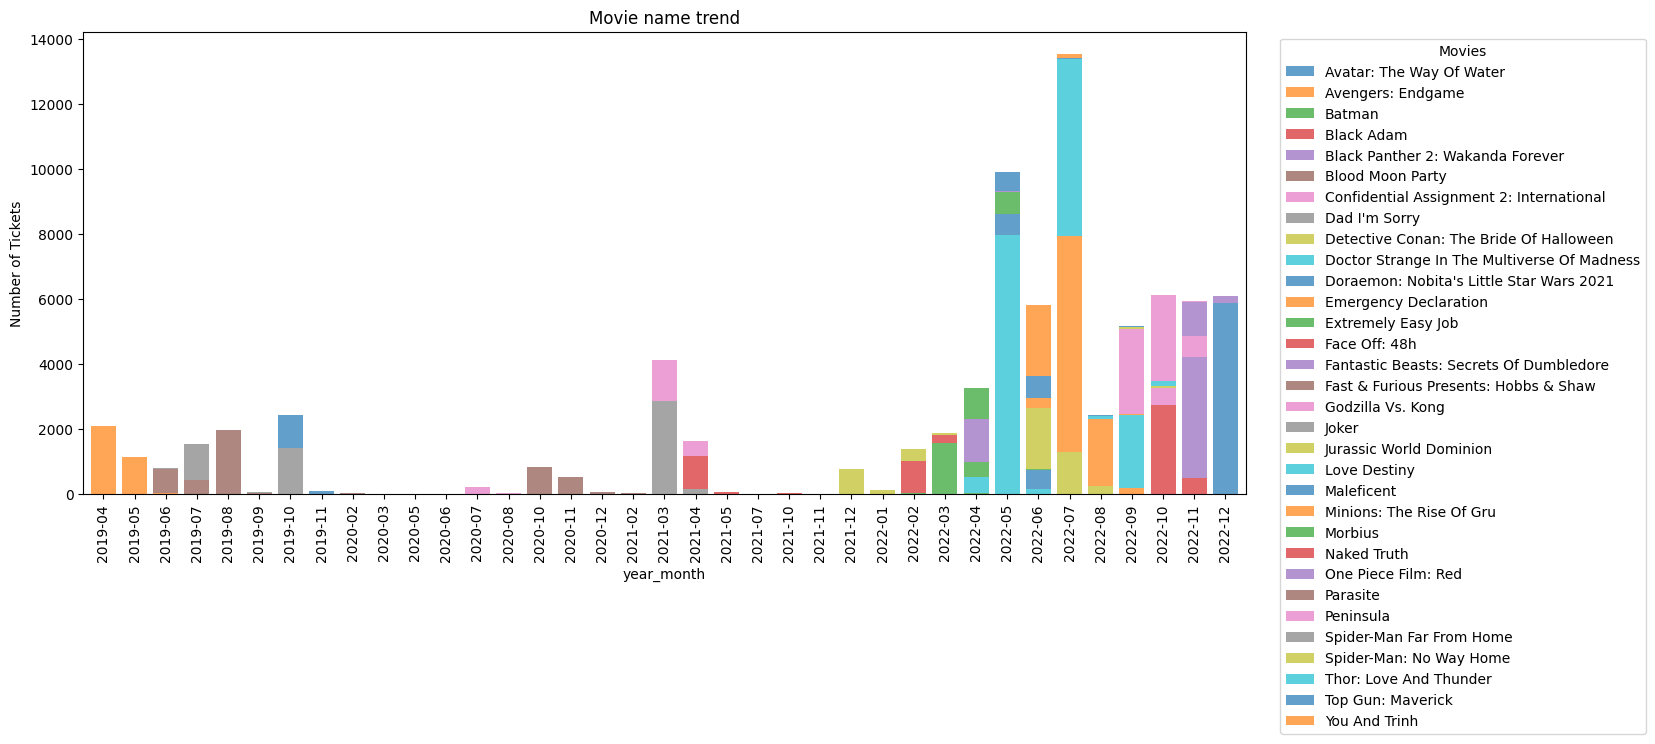

In [352]:
# Biểu đồ cột chồng
ax = df_movie_time_pivot.plot(x = 'year_month', kind='bar', stacked=True, figsize=(15, 6), width=0.8, alpha = 0.7)
ax.set_title('Movie name trend')
ax.set_ylabel('Number of Tickets')

plt.legend(title='Movies', loc='upper right', bbox_to_anchor=(1.35, 1))
plt.show()

## 3.4. Customer value dimension

- Mục tiêu: Phân tích các chỉ số về giá trị mà 1 khách hàng mang lại
    + Frequency: count, day, month
    + Monetary: total_money, total_discount
    + Success_rate = number_success / total
    + Promotion_rate = number_promotion / total_success
    + Discount rate = sum_discount / sum_money

In [353]:
df_join_all.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,description,error_group,model,platform,age_days,age,month,name_day,hour,year_month,os_version,type
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,Order successful,unknown,"iPhone13,1",mobile,13073,35,7,Friday,17,2022-07,ios,promotion
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,Order successful,unknown,browser,website,12239,33,7,Friday,20,2022-07,browser,promotion
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Male,1989-05-18,unknown,Order successful,unknown,unknown,mobile,12991,35,7,Saturday,11,2022-07,unknown,non-promotion
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Male,1997-08-31,direct discount,Order successful,unknown,devicemodel,mobile,9964,27,7,Monday,22,2022-07,unknown,promotion
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Male,1988-09-20,direct discount,Order successful,unknown,devicemodel,mobile,13231,36,7,Sunday,18,2022-07,unknown,promotion


In [354]:
# Tính các chỉ số cho những vé thanh toán thành công

def calculate_n_promotion(x):
    return (x == 'promotion').sum()

df_success_metric = (
    df_join_all[df_join_all['status_id'] == 1]
    .assign(date = pd.to_datetime(df_join_all['time']).dt.date)
    .groupby('customer_id')
    .agg(
        n_success = ('ticket_id', 'count'),
        s_money = ('original_price', 'sum'),
        s_discount = ('discount_value', 'sum'),
        n_days = ('date', 'nunique'),
        n_months = ('year_month', 'nunique'),
        n_promotions = ('type', calculate_n_promotion)
    )
    .reset_index()
)

df_success_metric.head()

,customer_id,n_success,s_money,s_discount,n_days,n_months,n_promotions
0,100001,1,7.42,2.06,1,1,1
1,100003,6,60.95,2.56,6,6,1
2,100004,1,32.25,0.00,1,1,0
3,100005,1,9.49,2.06,1,1,1
4,100006,1,12.37,0.00,1,1,0


In [355]:
# Tính total và số giao dịch lỗi

def calculate_n_failed(x):
    return (x != 1).sum()

df_failed_metric = (
    df_join_all.groupby('customer_id')
    .agg(
        n_total = ('ticket_id', 'count'),
        n_failed = ('status_id', calculate_n_failed)
    )
    .reset_index()
)

df_failed_metric.head()

,customer_id,n_total,n_failed
0,100001,1,0
1,100003,6,0
2,100004,1,0
3,100005,1,0
4,100006,1,0


In [356]:
# Join 2 bảng này lại

df_customer_value = (
    pd.merge(df_failed_metric, df_success_metric, how='left', on='customer_id')
    .fillna(0)
)

df_customer_value.head()

,customer_id,n_total,n_failed,n_success,s_money,s_discount,n_days,n_months,n_promotions
0,100001,1,0,1.0,7.42,2.06,1.0,1.0,1.0
1,100003,6,0,6.0,60.95,2.56,6.0,6.0,1.0
2,100004,1,0,1.0,32.25,0.00,1.0,1.0,0.0
3,100005,1,0,1.0,9.49,2.06,1.0,1.0,1.0
4,100006,1,0,1.0,12.37,0.00,1.0,1.0,0.0


In [357]:
df_customer_value['success_rate'] = df_customer_value['n_success'] / df_customer_value['n_total']
df_customer_value['promotion_rate'] = df_customer_value['n_promotions'] / df_customer_value['n_success']
df_customer_value['discount_rate'] = df_customer_value['s_discount'] / df_customer_value['s_money']

df_customer_value.head()

,customer_id,n_total,n_failed,n_success,s_money,s_discount,n_days,n_months,n_promotions,success_rate,promotion_rate,discount_rate
0,100001,1,0,1.0,7.42,2.06,1.0,1.0,1.0,1.0,1.000000,0.277628
1,100003,6,0,6.0,60.95,2.56,6.0,6.0,1.0,1.0,0.166667,0.042002
2,100004,1,0,1.0,32.25,0.00,1.0,1.0,0.0,1.0,0.000000,0.000000
3,100005,1,0,1.0,9.49,2.06,1.0,1.0,1.0,1.0,1.000000,0.217071
4,100006,1,0,1.0,12.37,0.00,1.0,1.0,0.0,1.0,0.000000,0.000000


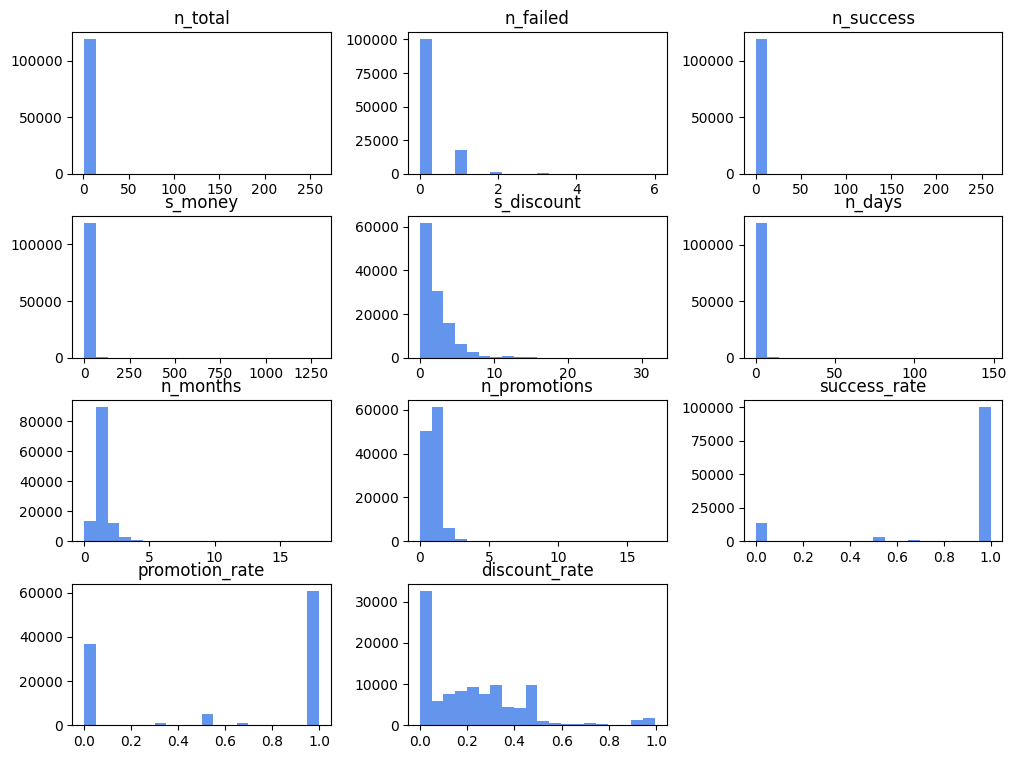

In [358]:
# Visualize tất cả các chỉ số bằng histogram

df_customer_value.iloc[:, 1:].hist(figsize=(12, 9), grid=False, color='cornflowerblue', bins=20)
plt.show()

* Notes:
- **n_total**: Hầu hết khách hàng mua vé rất ít (1-2 vé), tuy nhiên có những người mua rất nhiều -> check những người này
- **success_rate**: Có khoảng 10% khách hàng giao dịch success_rate = 0% -> lỗi?
- **promotion_rate**: Có hơn 60000 chỉ tham gia promotion (rate = 100%)
- **n_promotions**: 60000 khách hàng chỉ hưởng promotion 1 lần -> có liên quan đến nhóm ở promotion_rate = 100% ?


### Frequency and anomaly behavior

In [359]:
df_customer_value['n_order_dis'] = df_customer_value['n_success'].apply(lambda x: 'more than 10' if x >= 10 else str(x))
df_customer_value.head()

,customer_id,n_total,n_failed,n_success,s_money,s_discount,n_days,n_months,n_promotions,success_rate,promotion_rate,discount_rate,n_order_dis
0,100001,1,0,1.0,7.42,2.06,1.0,1.0,1.0,1.0,1.000000,0.277628,1.0
1,100003,6,0,6.0,60.95,2.56,6.0,6.0,1.0,1.0,0.166667,0.042002,6.0
2,100004,1,0,1.0,32.25,0.00,1.0,1.0,0.0,1.0,0.000000,0.000000,1.0
3,100005,1,0,1.0,9.49,2.06,1.0,1.0,1.0,1.0,1.000000,0.217071,1.0
4,100006,1,0,1.0,12.37,0.00,1.0,1.0,0.0,1.0,0.000000,0.000000,1.0


In [360]:
df_n_dis = df_customer_value.groupby('n_order_dis').agg(
    total_cus = ('customer_id', 'count')
).reset_index()

df_n_dis

,n_order_dis,total_cus
0,0.0,13701
1,1.0,87921
2,2.0,12902
3,3.0,3145
4,4.0,1017
5,5.0,380
6,6.0,168
7,7.0,92
8,8.0,47
9,9.0,30


Text(0.5, 1.0, '#distribution of number tickets by customer')

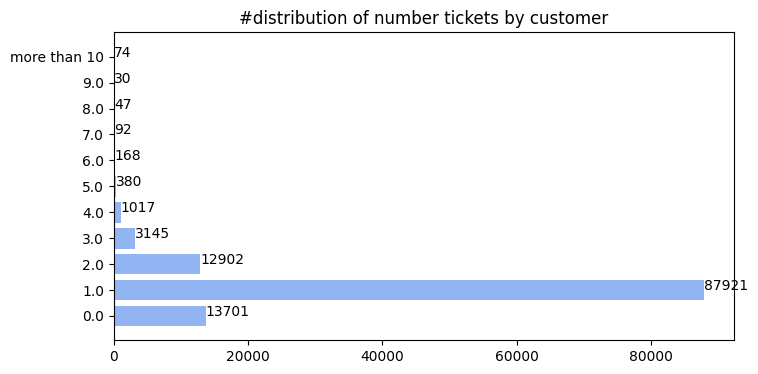

In [361]:
# Biểu đồ cột ngang
plt.figure(figsize=(8, 4))

plt.barh(
    df_n_dis['n_order_dis'], df_n_dis['total_cus'],
    color = 'cornflowerblue',
    alpha = 0.7
)

for index, value in enumerate(df_n_dis['total_cus']):
    plt.text(value, index, str(value))

plt.title('#distribution of number tickets by customer')

In [362]:
df_customer_value.count()

customer_id       119477
n_total           119477
n_failed          119477
n_success         119477
s_money           119477
s_discount        119477
n_days            119477
n_months          119477
n_promotions      119477
success_rate      119477
promotion_rate    105776
discount_rate     105776
n_order_dis       119477
dtype: int64

*Notes
- Nếu khách hàng mua vé dồn vào 1 lúc -> bất thường
- Nếu mua dàn trải -> bình thường

In [363]:
df_customer_value.sort_values(by='n_success', ascending=False).head()

,customer_id,n_total,n_failed,n_success,s_money,s_discount,n_days,n_months,n_promotions,success_rate,promotion_rate,discount_rate,n_order_dis
2686,102948,260,0,260.0,1291.25,3.38,148.0,18.0,1.0,1.000000,0.003846,0.002618,more than 10
48948,153588,108,1,107.0,434.59,0.00,77.0,14.0,0.0,0.990741,0.000000,0.000000,more than 10
10604,111644,104,0,104.0,581.70,18.52,85.0,18.0,9.0,1.000000,0.086538,0.031838,more than 10
15783,117362,104,1,103.0,744.86,8.62,79.0,15.0,6.0,0.990385,0.058252,0.011573,more than 10
16687,118349,83,3,80.0,344.56,4.21,62.0,17.0,1.0,0.963855,0.012500,0.012218,more than 10


In [364]:
list_customer_massive = list(df_customer_value[df_customer_value['n_success'] > 30]['customer_id'].unique())
list_customer_massive

[102948,
 103035,
 103347,
 108110,
 108162,
 108729,
 111644,
 114205,
 117140,
 117362,
 117475,
 118349,
 122962,
 131905,
 153124,
 153588,
 158089,
 168132,
 179471,
 222641,
 226527,
 226886]

In [365]:
df_customer_massive_pivot = (
    df_join_all[(df_join_all['customer_id'].isin(list_customer_massive)) & (df_join_all['status_id'] == 1)]
    .pivot_table(index='year_month', columns='customer_id', aggfunc='count', values='ticket_id')
    .reset_index() 
)

df_customer_massive_pivot.head()

customer_id,year_month,102948,103035,103347,108110,108162,108729,111644,114205,117140,117362,117475,118349,122962,131905,153124,153588,158089,168132,179471,222641,226527,226886
0,2019-01,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-04,NaN,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN
4,2019-05,NaN,2.0,NaN,NaN,4.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,2.0,3.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN


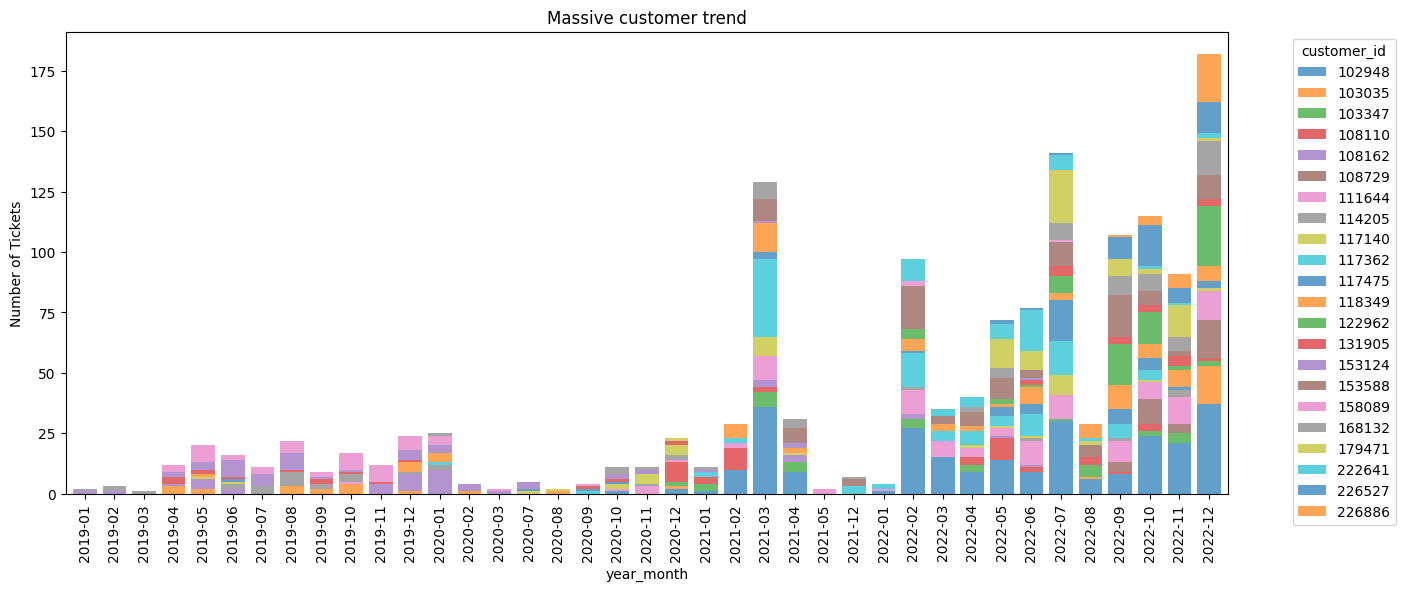

In [366]:
# Biểu đồ cột chồng
ax = df_customer_massive_pivot.plot(x = 'year_month', kind='bar', stacked=True, figsize=(15, 6), width=0.8, alpha = 0.7)
ax.set_title('Massive customer trend')
ax.set_ylabel('Number of Tickets')

plt.legend(title='customer_id', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

### Massive promotion

In [367]:
df_customer_value['n_promo_dis'] = df_customer_value['n_promotions'].apply(lambda x: 'more than 10' if x >= 10 else str(x))
df_customer_value.head()

,customer_id,n_total,n_failed,n_success,s_money,s_discount,n_days,n_months,n_promotions,success_rate,promotion_rate,discount_rate,n_order_dis,n_promo_dis
0,100001,1,0,1.0,7.42,2.06,1.0,1.0,1.0,1.0,1.000000,0.277628,1.0,1.0
1,100003,6,0,6.0,60.95,2.56,6.0,6.0,1.0,1.0,0.166667,0.042002,6.0,1.0
2,100004,1,0,1.0,32.25,0.00,1.0,1.0,0.0,1.0,0.000000,0.000000,1.0,0.0
3,100005,1,0,1.0,9.49,2.06,1.0,1.0,1.0,1.0,1.000000,0.217071,1.0,1.0
4,100006,1,0,1.0,12.37,0.00,1.0,1.0,0.0,1.0,0.000000,0.000000,1.0,0.0


In [368]:
df_promo_dis = df_customer_value.groupby('n_promo_dis').agg(
    total_cus = ('customer_id', 'count')
).reset_index()

df_promo_dis

,n_promo_dis,total_cus
0,0.0,50498
1,1.0,61334
2,2.0,6264
3,3.0,1042
4,4.0,230
5,5.0,74
6,6.0,19
7,7.0,10
8,8.0,2
9,9.0,2


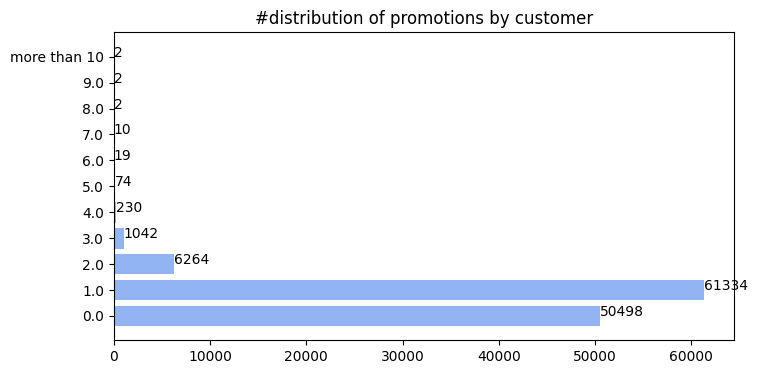

In [369]:
# Biểu đồ cột ngang
plt.figure(figsize=(8, 4))

plt.barh(
    df_promo_dis['n_promo_dis'], df_promo_dis['total_cus'],
    color = 'cornflowerblue',
    alpha = 0.7
)

for index, value in enumerate(df_promo_dis['total_cus']):
    plt.text(value, index, str(value))

plt.title('#distribution of promotions by customer')
plt.show()

*Notes
- Gần 60% khách hàng có join các chương trình khuyến mãi
- Trong đó 90% là chỉ hưởng khuyến mãi 1 lần duy nhất
    + Khách hàng đến 1 lần rồi thôi
    + Các chương trình promotion chỉ cho khách hàng dùng 1 lần (dành cho khách hàng mới) ??

In [370]:
# Đánh giá loại khuyến mại mà khách hàng dùng
df_type_group = (
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['type'] == 'promotion')]
    .groupby('campaign_type').agg(total = ('ticket_id', 'count'))
    .reset_index()
)

df_type_group

,campaign_type,total
0,direct discount,68449
1,reward point,3150
2,voucher,6924


In [371]:
# Tính tỷ lệ loại khuyến mãi chi tiết cho từng nhóm khách hàng (nhóm 1 KM, 2 KM, 3 KM, ...)
df_n_success = (
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['type'] == 'promotion')]
    .groupby('customer_id')
    .agg(n_promotions = ('ticket_id', 'count'))
    .reset_index()
)

df_n_success.head()

,customer_id,n_promotions
0,100001,1
1,100003,1
2,100005,1
3,100007,1
4,100009,7


In [372]:
df_n_pivot = (
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['type'] == 'promotion')]
    .pivot_table(index='customer_id', columns='campaign_type', aggfunc='count', values='ticket_id')
    .reset_index()
)

df_n_pivot.head()

campaign_type,customer_id,direct discount,reward point,voucher
0,100001,NaN,NaN,1.0
1,100003,1.0,NaN,NaN
2,100005,NaN,NaN,1.0
3,100007,1.0,NaN,NaN
4,100009,7.0,NaN,NaN


In [373]:
df_n_join = (
    pd.merge(df_n_success, df_n_pivot, how='inner', on='customer_id')
    .groupby('n_promotions').agg(
        n_cus = ('customer_id', 'count'),
        n_voucher = ('voucher', 'sum'),
        n_direct_discount = ('direct discount', 'sum'),
        n_reward_point = ('reward point', 'sum')
    )
    .reset_index()
)

df_n_join

,n_promotions,n_cus,n_voucher,n_direct_discount,n_reward_point
0,1,61334,5358.0,53098.0,2878.0
1,2,6264,1091.0,11222.0,215.0
2,3,1042,293.0,2788.0,45.0
3,4,230,87.0,827.0,6.0
4,5,74,43.0,323.0,4.0
5,6,19,12.0,102.0,0.0
6,7,10,14.0,54.0,2.0
7,8,2,2.0,14.0,0.0
8,9,2,6.0,12.0,0.0
9,10,1,1.0,9.0,0.0


In [374]:
df_n_join['total'] = df_n_join.iloc[:, 2:].sum(axis=1)
df_n_join

,n_promotions,n_cus,n_voucher,n_direct_discount,n_reward_point,total
0,1,61334,5358.0,53098.0,2878.0,61334.0
1,2,6264,1091.0,11222.0,215.0,12528.0
2,3,1042,293.0,2788.0,45.0,3126.0
3,4,230,87.0,827.0,6.0,920.0
4,5,74,43.0,323.0,4.0,370.0
5,6,19,12.0,102.0,0.0,114.0
6,7,10,14.0,54.0,2.0,70.0
7,8,2,2.0,14.0,0.0,16.0
8,9,2,6.0,12.0,0.0,18.0
9,10,1,1.0,9.0,0.0,10.0


In [375]:
for i in df_n_join.columns[2:5]:
    df_n_join[i + '_pct'] = df_n_join[i] / df_n_join['total']
    
df_n_join

,n_promotions,n_cus,n_voucher,n_direct_discount,n_reward_point,total,n_voucher_pct,n_direct_discount_pct,n_reward_point_pct
0,1,61334,5358.0,53098.0,2878.0,61334.0,0.087358,0.865719,0.046923
1,2,6264,1091.0,11222.0,215.0,12528.0,0.087085,0.895754,0.017162
2,3,1042,293.0,2788.0,45.0,3126.0,0.093730,0.891875,0.014395
3,4,230,87.0,827.0,6.0,920.0,0.094565,0.898913,0.006522
4,5,74,43.0,323.0,4.0,370.0,0.116216,0.872973,0.010811
5,6,19,12.0,102.0,0.0,114.0,0.105263,0.894737,0.000000
6,7,10,14.0,54.0,2.0,70.0,0.200000,0.771429,0.028571
7,8,2,2.0,14.0,0.0,16.0,0.125000,0.875000,0.000000
8,9,2,6.0,12.0,0.0,18.0,0.333333,0.666667,0.000000
9,10,1,1.0,9.0,0.0,10.0,0.100000,0.900000,0.000000


In [376]:
# Heat map cho table
format_dict = {'total': '{:.0f}', 'n_voucher_pct': '{:.0%}', 'n_direct_discount_pct': '{:.0%}', 'n_reward_point_pct': '{:.0%}'}

(
    df_n_join
    .drop(columns=['n_voucher', 'n_direct_discount', 'n_reward_point'])
    .style
    .format(format_dict)
    .background_gradient(subset=['n_voucher_pct', 'n_direct_discount_pct', 'n_reward_point_pct'], cmap = 'PuBu')
    .background_gradient(subset=['total'], cmap = 'YlGn')
)

,n_promotions,n_cus,total,n_voucher_pct,n_direct_discount_pct,n_reward_point_pct
0,1,61334,61334,9%,87%,5%
1,2,6264,12528,9%,90%,2%
2,3,1042,3126,9%,89%,1%
3,4,230,920,9%,90%,1%
4,5,74,370,12%,87%,1%
5,6,19,114,11%,89%,0%
6,7,10,70,20%,77%,3%
7,8,2,16,12%,88%,0%
8,9,2,18,33%,67%,0%
9,10,1,10,10%,90%,0%


*Notes
- ~90% khách hàng chọn tham gia các campaign direct discount
- Đánh giá thêm về Retention của khách hàng -> Quay trở lại? -> Hiệu quả của MKT?

## 3.5. Customer retention - Cohort analysis
- Đánh giá tỉ lệ giữ chân khách hàng
- Tìm ra các yếu tố ảnh hưởng đến retention

In [377]:
from operator import attrgetter
import matplotlib.colors as mcolors
import seaborn as sns

In [378]:
# Bước 1: Tính toán các thông tin: cohort (first_month), current_month, subsequent month
df_selected_time = df_join_all[ (df_join_all['time'] < '2020-01-01') & (df_join_all['status_id'] == 1)]
df_selected_time['first_month'] = df_selected_time.groupby('customer_id')['time'].transform('min').dt.to_period('M')
df_selected_time['current_month'] = df_selected_time['time'].dt.to_period('M')
df_selected_time['subsequent_month'] = (df_selected_time['current_month'] - df_selected_time['first_month']).apply(attrgetter('n'))

df_selected_time.head()

C:\Users\Hi\AppData\Local\Temp\ipykernel_2964\445323758.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_time['first_month'] = df_selected_time.groupby('customer_id')['time'].transform('min').dt.to_period('M')
C:\Users\Hi\AppData\Local\Temp\ipykernel_2964\445323758.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_time['current_month'] = df_selected_time['time'].dt.to_period('M')
C:\Users\Hi\AppData\Local\Temp\ipykernel_2964\445323758.py:5: SettingWithCopyWarning: 
A value is tr

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,description,error_group,model,platform,age_days,age,month,name_day,hour,year_month,os_version,type,first_month,current_month,subsequent_month
11327,9e3e753f70aede1c6dcc577ce563eef1,100009,credit card,74.0,3cac5d2e2eb76525aecea5c2ab46b3d9,9.07,2.56,6.51,2019-11-09 16:19:41.008,1,25680,Doctor Sleep,Male,1989-02-25,direct discount,Order successful,unknown,"iPhone10,2",mobile,13073,35,11,Saturday,16,2019-11,ios,promotion,2019-04,2019-11,7
11328,74a0ac9b7c60d2e7d3664686c3342c00,101892,money in app,79.0,fe9a5c91e224f005a8be1c62923548d8,9.07,2.56,6.51,2019-11-16 16:35:02.953,1,25690,Doctor Sleep,Female,1986-10-19,direct discount,Order successful,unknown,Samsung SM-N935F,mobile,13933,38,11,Saturday,16,2019-11,android & other,promotion,2019-08,2019-11,3
11329,4a653fb01188cfaefe7e3731de2648de,105574,credit card,43.0,99b47df3cdeecb3dec4da6c18b916dd0,9.07,2.56,6.51,2019-11-09 18:10:13.461,1,25680,Doctor Sleep,Male,1935-01-01,direct discount,Order successful,unknown,"iPhone9,2",mobile,32852,89,11,Saturday,18,2019-11,ios,promotion,2019-11,2019-11,0
11332,f075d68aa14bc424e3d9ca7904f900a5,111681,credit card,123.0,a43fb711603d5f2be7001397d280e413,8.66,2.10,6.56,2019-11-16 22:02:42.851,1,25690,Doctor Sleep,Not verify,1970-01-01,direct discount,Order successful,unknown,HTC HTC_U-3u,mobile,20068,54,11,Saturday,22,2019-11,android & other,promotion,2019-11,2019-11,0
11333,747efd023e43617ca96e127c8af625b8,116896,money in app,72.0,ac219f148fe5a9653b48ce64b41625b7,6.19,0.00,6.19,2019-11-13 17:32:32.892,1,0,Doctor Sleep,Male,1990-08-30,unknown,Order successful,unknown,OnePlus HD1900,mobile,12522,34,11,Wednesday,17,2019-11,android & other,non-promotion,2019-11,2019-11,0


In [379]:
# Bước 2: Group by cohort
df_cohort = (
    df_selected_time
    .groupby(['first_month', 'current_month', 'subsequent_month'])
    .agg(n_customers = ('customer_id', 'nunique'))
    .reset_index(drop=False)
)

df_cohort.head(10)

,first_month,current_month,subsequent_month,n_customers
0,2019-01,2019-01,0,1348
1,2019-01,2019-02,1,50
2,2019-01,2019-03,2,35
3,2019-01,2019-04,3,26
4,2019-01,2019-05,4,25
5,2019-01,2019-06,5,33
6,2019-01,2019-07,6,36
7,2019-01,2019-08,7,29
8,2019-01,2019-09,8,18
9,2019-01,2019-10,9,35


In [380]:
# Pivot table
df_cohort_pivot = (
    df_cohort
    .pivot_table(index = 'first_month', columns = 'subsequent_month', values='n_customers')
)

df_cohort_pivot

subsequent_month,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2019-01,1348.0,50.0,35.0,26.0,25.0,33.0,36.0,29.0,18.0,35.0,21.0,20.0
2019-02,1293.0,58.0,88.0,64.0,78.0,50.0,58.0,30.0,46.0,29.0,35.0,NaN
2019-03,745.0,51.0,48.0,49.0,33.0,33.0,30.0,34.0,23.0,14.0,NaN,NaN
2019-04,2922.0,101.0,103.0,87.0,92.0,66.0,96.0,63.0,42.0,NaN,NaN,NaN
2019-05,3226.0,145.0,118.0,129.0,90.0,93.0,90.0,62.0,NaN,NaN,NaN,NaN
2019-06,3062.0,131.0,151.0,98.0,133.0,114.0,63.0,NaN,NaN,NaN,NaN,NaN
2019-07,2611.0,121.0,79.0,99.0,78.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,3735.0,112.0,155.0,106.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,2169.0,117.0,67.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [381]:
# Chuyển sang %
cohort_size = df_cohort_pivot.iloc[:, 0]
retention_matrix = df_cohort_pivot.divide(cohort_size, axis = 0)

cohort_size

first_month
2019-01    1348.0
2019-02    1293.0
2019-03     745.0
2019-04    2922.0
2019-05    3226.0
2019-06    3062.0
2019-07    2611.0
2019-08    3735.0
2019-09    2169.0
2019-10    3364.0
2019-11    1522.0
2019-12     834.0
Freq: M, Name: 0, dtype: float64

In [382]:
retention_matrix

subsequent_month,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2019-01,1.0,0.037092,0.025964,0.019288,0.018546,0.024481,0.026706,0.021513,0.013353,0.025964,0.015579,0.014837
2019-02,1.0,0.044857,0.068059,0.049497,0.060325,0.038670,0.044857,0.023202,0.035576,0.022428,0.027069,NaN
2019-03,1.0,0.068456,0.064430,0.065772,0.044295,0.044295,0.040268,0.045638,0.030872,0.018792,NaN,NaN
2019-04,1.0,0.034565,0.035250,0.029774,0.031485,0.022587,0.032854,0.021561,0.014374,NaN,NaN,NaN
2019-05,1.0,0.044947,0.036578,0.039988,0.027898,0.028828,0.027898,0.019219,NaN,NaN,NaN,NaN
2019-06,1.0,0.042782,0.049314,0.032005,0.043436,0.037231,0.020575,NaN,NaN,NaN,NaN,NaN
2019-07,1.0,0.046342,0.030257,0.037917,0.029874,0.015320,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,1.0,0.029987,0.041499,0.028380,0.017135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,1.0,0.053942,0.030890,0.017981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


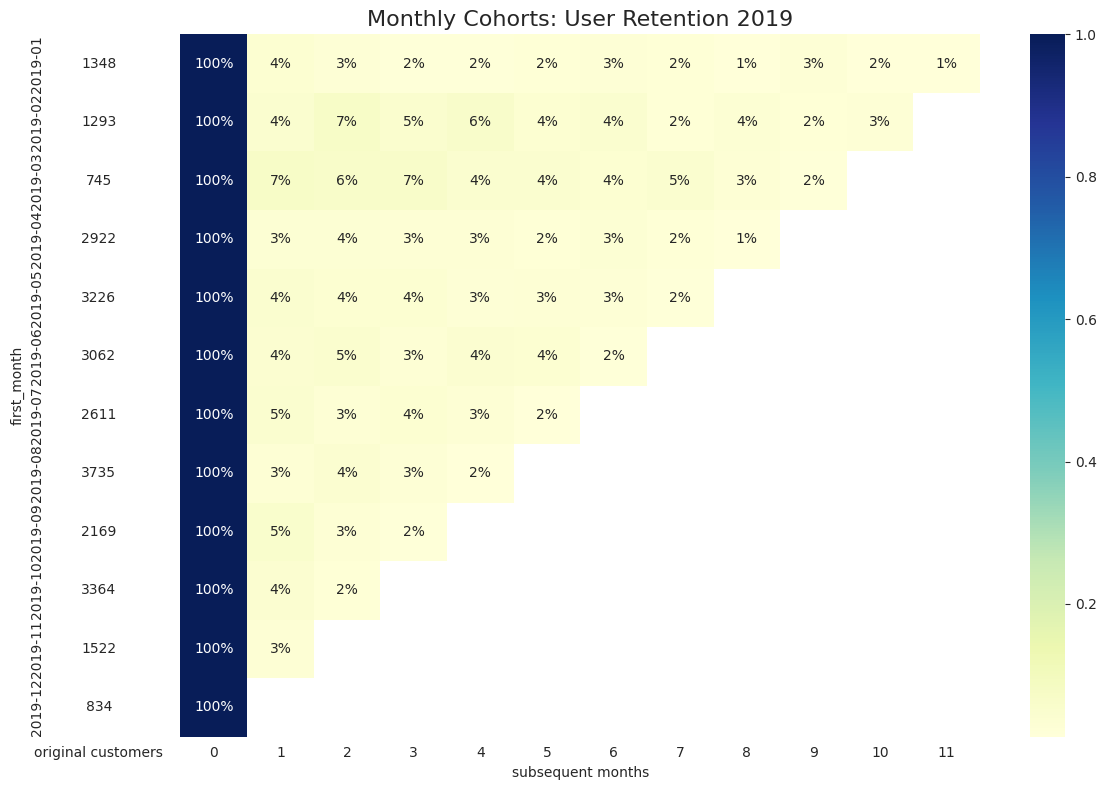

In [383]:
# Vẽ biểu đồ cohort
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='YlGnBu',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention 2019', fontsize=16)
    ax[1].set(xlabel='subsequent months', 
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'original customers'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                alpha=0.5,  
                ax=ax[0])


    fig.tight_layout()

In [384]:
# Bước 1: Tính toán các thông tin: cohort (first_month), current_month, subsequent month
df_selected_time = df_join_all[ (df_join_all['time'] > '2022-01-01') & (df_join_all['status_id'] == 1)]
df_selected_time['first_month'] = df_selected_time.groupby('customer_id')['time'].transform('min').dt.to_period('M')
df_selected_time['current_month'] = df_selected_time['time'].dt.to_period('M')
df_selected_time['subsequent_month'] = (df_selected_time['current_month'] - df_selected_time['first_month']).apply(attrgetter('n'))

C:\Users\Hi\AppData\Local\Temp\ipykernel_2964\1323665239.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_time['first_month'] = df_selected_time.groupby('customer_id')['time'].transform('min').dt.to_period('M')
C:\Users\Hi\AppData\Local\Temp\ipykernel_2964\1323665239.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_time['current_month'] = df_selected_time['time'].dt.to_period('M')
C:\Users\Hi\AppData\Local\Temp\ipykernel_2964\1323665239.py:5: SettingWithCopyWarning: 
A value is

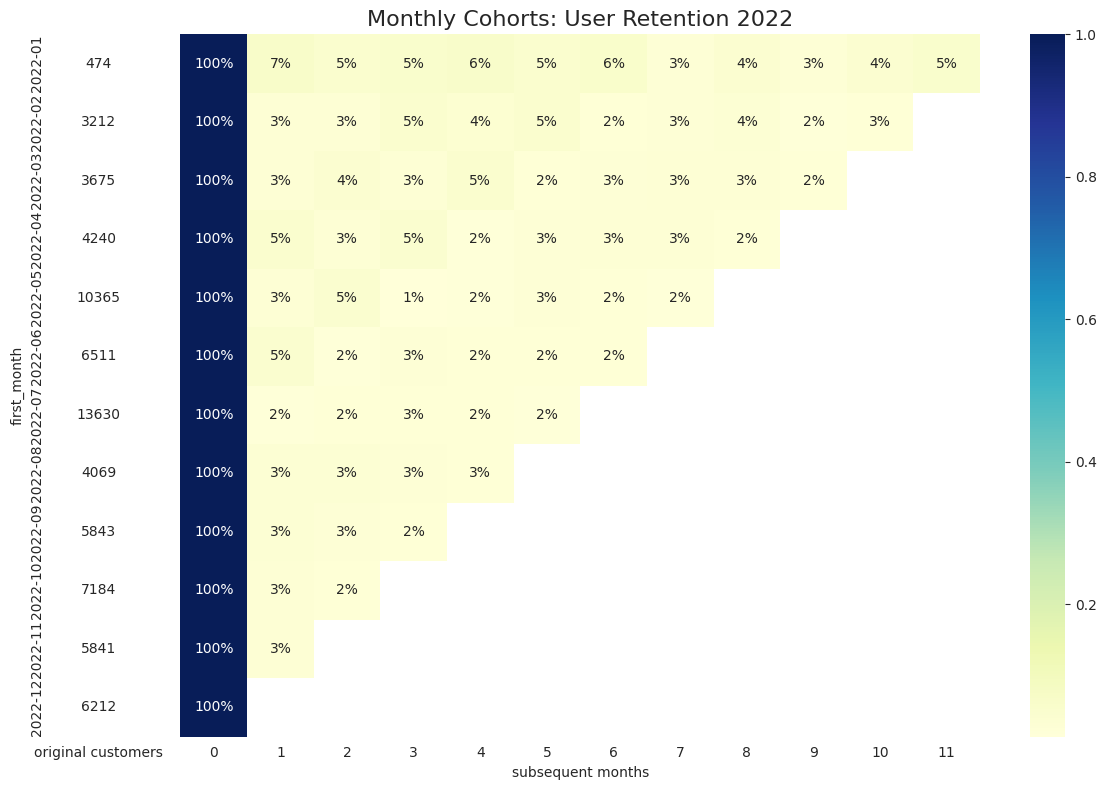

In [385]:
# Bước 2: Group by cohort
df_cohort = (
    df_selected_time
    .groupby(['first_month', 'current_month', 'subsequent_month'])
    .agg(n_customers = ('customer_id', 'nunique'))
    .reset_index(drop=False)
)

# Pivot table
df_cohort_pivot = (
    df_cohort
    .pivot_table(index = 'first_month', columns = 'subsequent_month', values='n_customers')
)

# chuyển sang %
cohort_size = df_cohort_pivot.iloc[:,0]
retention_matrix = df_cohort_pivot.divide(cohort_size, axis = 0)

# Vẽ biểu đồ cohort
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # retention matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='YlGnBu',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention 2022', fontsize=16)
    ax[1].set(xlabel='subsequent months',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'original customers'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                alpha=0.5,
                ax=ax[0])

    fig.tight_layout()

*Note
- Retention 2019 và 2022 không có nhiều sự thay đổi, do thị trường phim mới hồi phục nên chưa có nhiều thời gian để công ty cải thiện
- Lí do retention thấp mặc dù rõ ràng 60-65% traffic có chạy promotion trong năm 2022?

### Compare: Retention of promotion customers & organic customers

In [386]:
# By payment method
df_pie_promo = (
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['time'] > '2022-01-01')]
    .groupby('type')
    .agg(total_ticket = ('customer_id', 'nunique'))
    .sort_values(by='total_ticket').reset_index()
)

df_pie_promo

,type,total_ticket
0,non-promotion,27672
1,promotion,47507


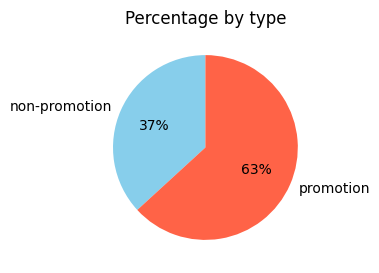

In [387]:
# Pie
plt.figure(figsize=(6, 3))
plt.pie(df_pie_promo['total_ticket'],
        labels=df_pie_promo['type'],
        autopct='%1.0f%%',
        colors=df_pie_promo['type'].replace({'promotion': 'tomato', 'non-promotion': 'skyblue'}),
        startangle=90   
        )
plt.title('Percentage by type')
plt.show()

Phân biệt nhóm đến từ promotion và nhóm organic dựa vào vé đầu tiên (first order)

In [388]:
df_data_check = (
    df_join_all[(df_join_all['status_id'] == 1) & (df_join_all['time'] > '2022-01-01')][['customer_id', 'ticket_id', 'time', 'type']]
    .sort_values(by=['customer_id', 'time'])
)

df_data_check.head(10)

,customer_id,ticket_id,time,type
66484,100003,34c4764b4afa000af4c33a525f20eace,2022-05-22 12:52:12.105,non-promotion
10001,100004,1c4aa39842bfc83dbb5856c25a33d9cb,2022-12-20 06:26:21.373,non-promotion
108794,100007,5565ba5e22475c7cce298a2bea470428,2022-03-21 17:57:18.460,promotion
0,100009,4f5200dcdcf2396b8d50ff84bf423f32,2022-07-08 17:46:36.145,promotion
5585,100009,0724203b5146b0ebae6e3678ed7eccde,2022-12-24 09:32:45.477,promotion
69405,100013,f95441286dcfa045f61a5760662616e1,2022-05-05 12:22:44.587,non-promotion
140483,100018,1e40fb2d0f6264ed3127f79b1a12c9c9,2022-09-07 21:13:17.896,non-promotion
90595,100018,9a959ff1649950949ff2c0aff4b62205,2022-11-19 16:25:43.981,promotion
35270,100020,af02fc96a6703af7d93162d9f8c61dba,2022-05-28 19:09:37.936,promotion
16649,100023,5ed44ff62214268ffcb14d4ea78b04d8,2022-05-16 08:45:42.397,promotion


In [389]:
# Đánh số thứ tự các ticket của khách hàng
df_data_check['row_number'] = df_data_check.groupby('customer_id').cumcount() + 1
df_data_check.head(10)

,customer_id,ticket_id,time,type,row_number
66484,100003,34c4764b4afa000af4c33a525f20eace,2022-05-22 12:52:12.105,non-promotion,1
10001,100004,1c4aa39842bfc83dbb5856c25a33d9cb,2022-12-20 06:26:21.373,non-promotion,1
108794,100007,5565ba5e22475c7cce298a2bea470428,2022-03-21 17:57:18.460,promotion,1
0,100009,4f5200dcdcf2396b8d50ff84bf423f32,2022-07-08 17:46:36.145,promotion,1
5585,100009,0724203b5146b0ebae6e3678ed7eccde,2022-12-24 09:32:45.477,promotion,2
69405,100013,f95441286dcfa045f61a5760662616e1,2022-05-05 12:22:44.587,non-promotion,1
140483,100018,1e40fb2d0f6264ed3127f79b1a12c9c9,2022-09-07 21:13:17.896,non-promotion,1
90595,100018,9a959ff1649950949ff2c0aff4b62205,2022-11-19 16:25:43.981,promotion,2
35270,100020,af02fc96a6703af7d93162d9f8c61dba,2022-05-28 19:09:37.936,promotion,1
16649,100023,5ed44ff62214268ffcb14d4ea78b04d8,2022-05-16 08:45:42.397,promotion,1


In [390]:
# Số khách hàng có first payment là promotion
df_data_check[(df_data_check['type'] == 'promotion') & (df_data_check['row_number'] == 1)]['customer_id'].nunique()

46189

- Có 97% khách hàng đến từ promotion trong nhóm khách hàng có tham gia promotion -> Retention là bao nhiêu? 

In [391]:
df_first_promo_list = df_data_check[(df_data_check['type'] == 'promotion') & (df_data_check['row_number'] == 1)]['customer_id']
df_first_promo_list.drop_duplicates(inplace=True)
df_first_promo_list.head()

C:\Users\Hi\AppData\Local\Temp\ipykernel_2964\1061489633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_promo_list.drop_duplicates(inplace=True)


108794    100007
0         100009
35270     100020
16649     100023
63516     100028
Name: customer_id, dtype: int64

In [392]:
df_first_promo_check = pd.merge(df_data_check, df_first_promo_list, how='inner', on='customer_id')
df_first_promo_check.head()

,customer_id,ticket_id,time,type,row_number
0,100007,5565ba5e22475c7cce298a2bea470428,2022-03-21 17:57:18.460,promotion,1
1,100009,4f5200dcdcf2396b8d50ff84bf423f32,2022-07-08 17:46:36.145,promotion,1
2,100009,0724203b5146b0ebae6e3678ed7eccde,2022-12-24 09:32:45.477,promotion,2
3,100020,af02fc96a6703af7d93162d9f8c61dba,2022-05-28 19:09:37.936,promotion,1
4,100023,5ed44ff62214268ffcb14d4ea78b04d8,2022-05-16 08:45:42.397,promotion,1


In [393]:
(
    df_first_promo_check[df_first_promo_check['row_number'] == 2]['customer_id'].nunique()
    /
    df_first_promo_check['customer_id'].nunique()
)

0.1308969668102795

- 13% khách hàng quay lại kể từ lần đầu tham gia promotion (tỷ lệ chuyển đổi, giữ chân khách hàng = 13%)
-> Nhóm organic có khác biệt không?

In [394]:
df_first_non_promo_list = df_data_check[(df_data_check['type'] == 'non-promotion') & (df_data_check['row_number'] == 1)]['customer_id']
df_first_non_promo_list.drop_duplicates(inplace=True)
df_first_promo_list.head()

C:\Users\Hi\AppData\Local\Temp\ipykernel_2964\1155018938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_non_promo_list.drop_duplicates(inplace=True)


108794    100007
0         100009
35270     100020
16649     100023
63516     100028
Name: customer_id, dtype: int64

In [395]:
df_first_non_promo_check = pd.merge(df_data_check, df_first_non_promo_list, how='inner', on='customer_id')
df_first_non_promo_list.head()

66484     100003
10001     100004
69405     100013
140483    100018
150725    100024
Name: customer_id, dtype: int64

In [396]:
(
    df_first_non_promo_check[df_first_non_promo_check['row_number'] == 2]['customer_id'].nunique()
    /
    df_first_non_promo_check['customer_id'].nunique()
)

0.12195316551641601

- Nhóm khách hàng không tham gia khuyến mãi -> tỷ lệ quay lại = 12%

*Note:
- 97% promotion 2022 là dành cho new customers, tuy nhiên chỉ có 13% quay trở lại lần sau. Trong khí đó tỷ lệ này của nhóm organic là 12%
-> Công ty đang chú trọng acquire new customers nhưng chưa đẩy mạnh việc giữ chân và duy trì số lượng khách hàng cũ

# 3.6. Payment success rate

Overview

In [397]:
def calculate_n_success(x):
    return (x == 1).sum()

df_sr = (
    df_join_all
    .groupby('year_month')
    .agg(n_ords = ('ticket_id', 'count'), # total ticket
         n_success = ('status_id', calculate_n_success)) # success ticket
    .assign(success_rate=lambda x: (x['n_success'] / x['n_ords']) * 100) # tạo thêm 1 column tính SR
    .reset_index()
)

df_sr.head()

,year_month,n_ords,n_success,success_rate
0,2019-01,2019,1359,67.310550
1,2019-02,1626,1427,87.761378
2,2019-03,1004,866,86.254980
3,2019-04,4069,3190,78.397641
4,2019-05,4430,3617,81.647856


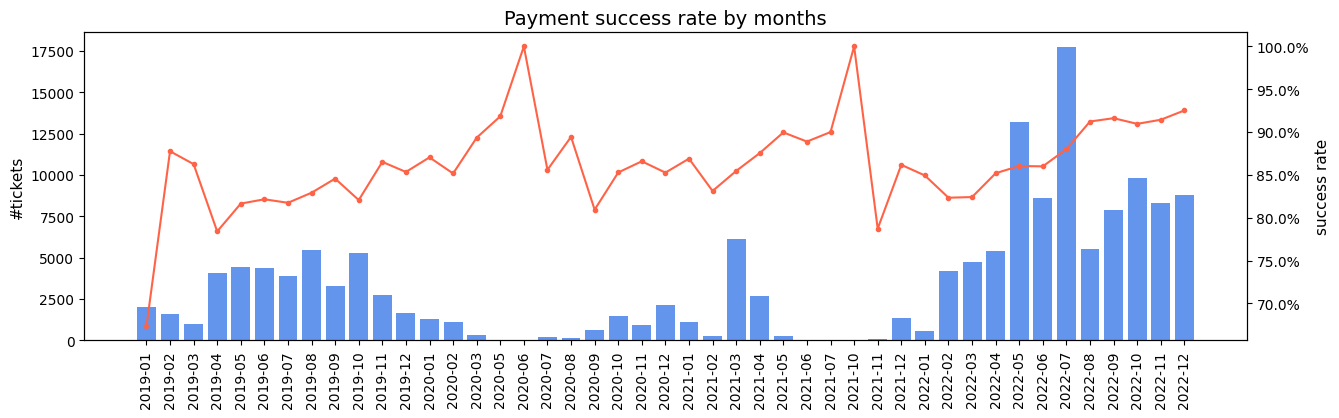

In [398]:
from matplotlib.ticker import PercentFormatter

fig, ax1 = plt.subplots(figsize=(15,4))

ax1.bar(df_sr['year_month'], df_sr['n_ords'], color="cornflowerblue")
plt.ylabel('#tickets', fontsize=11)
plt.xticks(rotation='vertical')

ax2 = ax1.twinx()
ax2.plot(df_sr['year_month'], df_sr['success_rate'], color="tomato", marker="o", ms=3)
ax2.yaxis.set_major_formatter(PercentFormatter())

plt.ylabel('success rate', fontsize=11)
plt.title('Payment success rate by months', fontsize=14)

plt.show()

### Error trend

In [399]:
df_join_all.head()

,ticket_id,customer_id,paying_method,theater_name,device_number,original_price,discount_value,final_price,time,status_id,campaign_id,movie_name,usergender,dob,campaign_type,description,error_group,model,platform,age_days,age,month,name_day,hour,year_month,os_version,type
0,4f5200dcdcf2396b8d50ff84bf423f32,100009,money in app,13.0,244764a57dbdeb8fe9b164847ad55183,9.90,2.10,7.80,2022-07-08 17:46:36.145,1,83330,Thor: Love And Thunder,Male,1989-02-25,direct discount,Order successful,unknown,"iPhone13,1",mobile,13073,35,7,Friday,17,2022-07,ios,promotion
1,07abbaf28c772692f0367ad992bb3184,100493,bank account,180.0,8fa83cf46284aafd6e5da6c96f7862b5,8.66,1.48,7.18,2022-07-15 20:44:09.952,1,83330,Thor: Love And Thunder,Male,1991-06-09,direct discount,Order successful,unknown,browser,website,12239,33,7,Friday,20,2022-07,browser,promotion
2,1fdbeb7eceba8a27d9d985b5b70c219a,100596,money in app,56.0,69cf9244654949047f006e441fa7a8a7,10.31,2.31,8.00,2022-07-30 11:16:55.483,1,0,Thor: Love And Thunder,Male,1989-05-18,unknown,Order successful,unknown,unknown,mobile,12991,35,7,Saturday,11,2022-07,unknown,non-promotion
3,7715c9955866bd296b98543412839abd,100852,bank account,119.0,879ed11af9d6d2b5cda4d299590735a7,27.75,1.03,26.72,2022-07-04 22:33:07.458,1,85940,Thor: Love And Thunder,Male,1997-08-31,direct discount,Order successful,unknown,devicemodel,mobile,9964,27,7,Monday,22,2022-07,unknown,promotion
4,776efd7bda0b715084430e6385f67746,100965,money in app,107.0,0a233600d993a02cc1d39fb0d87fc7de,4.33,1.03,3.30,2022-07-03 18:41:45.098,1,85940,Thor: Love And Thunder,Male,1988-09-20,direct discount,Order successful,unknown,devicemodel,mobile,13231,36,7,Sunday,18,2022-07,unknown,promotion


In [400]:
df_error_group = (
    df_join_all[df_join_all['status_id'] != 1]
    .groupby(['year_month', 'error_group'])
    .agg(n_ords = ('ticket_id', 'count'))
    .sort_values(by='year_month')
    .reset_index()
    )


df_error_group.head()

,year_month,error_group,n_ords
0,2019-01,customer,291
1,2019-01,external,369
2,2019-02,customer,66
3,2019-02,external,133
4,2019-03,customer,44


In [401]:
df_error_group['error_group'].unique()

array(['customer', 'external', 'internal'], dtype=object)

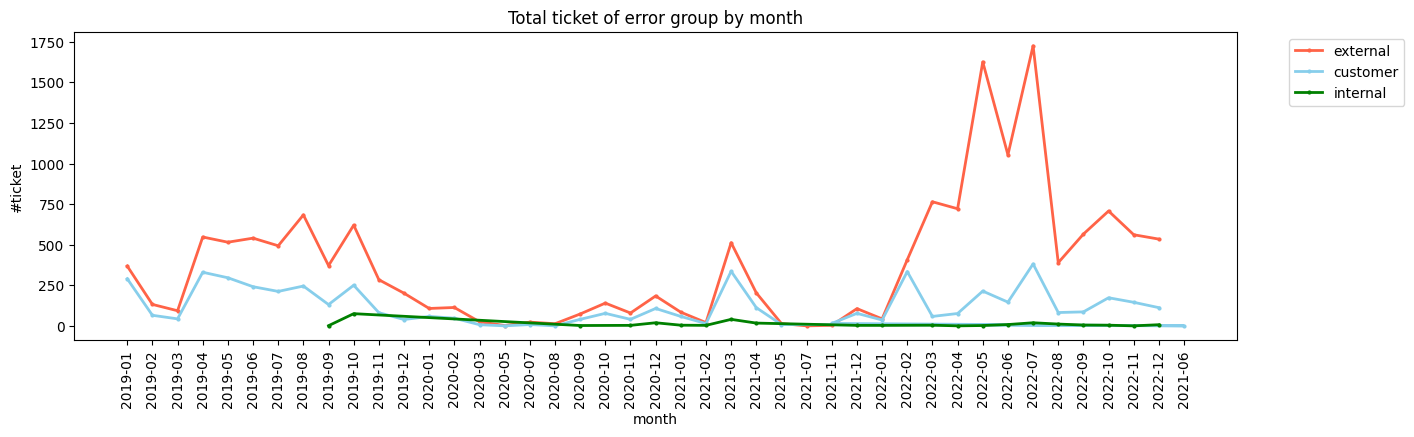

In [402]:
# Phân bố nhóm lỗi
error_color_group = [('external', 'tomato'), ('customer', 'skyblue'), ('internal', 'green')]

plt.figure(figsize=(15, 4))

for error, color in error_color_group:
    df_err_line = df_error_group[df_error_group['error_group'] == error]
    plt.plot(df_err_line['year_month'], df_err_line['n_ords'], label=error, marker='o', color=color, linewidth=2, markersize=2)
    
plt.title('Total ticket of error group by month')
plt.xlabel('month')
plt.ylabel('#ticket')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=90)
plt.show()

- Nhóm lỗi external tăng đột biến trong 2022 ?

In [403]:
df_error = (
    df_join_all[df_join_all['status_id'] != 1]
    .groupby(['year_month', 'description'])
    .agg(n_ords = ('ticket_id', 'count'))
    .sort_values(by='year_month')
    .reset_index()
)

df_error.head()

,year_month,description,n_ords
0,2019-01,Insufficient funds in customer account. Please add more funds and try the transaction again.,217
1,2019-01,No response from your bank,228
2,2019-01,Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.,56
3,2019-01,Payment failed from bank,141
4,2019-01,Payment overdue,18


In [404]:
df_error['description'].unique()

array(['Insufficient funds in customer account. Please add more funds and try the transaction again.',
       'No response from your bank',
       'Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.',
       'Payment failed from bank', 'Payment overdue',
       'Transaction temporarily limited',
       'Need verify your account to continue'], dtype=object)

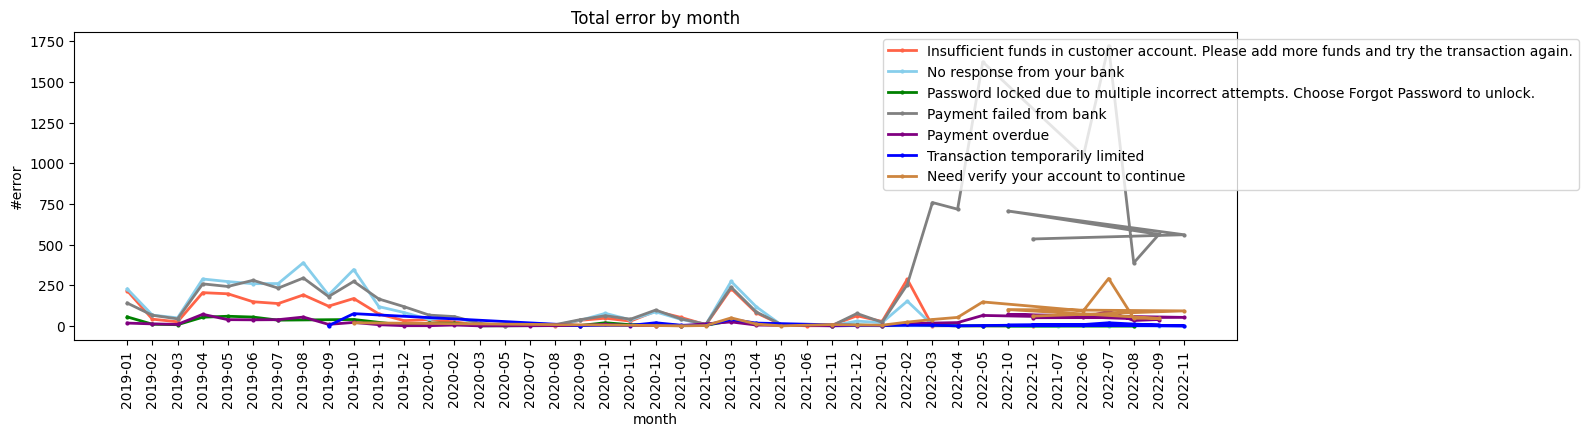

In [405]:
error_color_pairs = [('Insufficient funds in customer account. Please add more funds and try the transaction again.', 'tomato'),
                     ('No response from your bank', 'skyblue'),
                     ('Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.', 'green'),
                     ('Payment failed from bank', 'gray'),
                     ('Payment overdue', 'purple'),
                     ('Transaction temporarily limited', 'blue'),
                     ('Need verify your account to continue', 'peru')]

plt.figure(figsize=(15, 4))
for error, color in error_color_pairs:
    df_err_line = df_error[df_error['description'] == error]
    plt.plot(df_err_line['year_month'], df_err_line['n_ords'], label=error, marker='o', color=color, linewidth=2, markersize=2)
    
plt.title('Total error by month')
plt.xlabel('month')
plt.ylabel('#error')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation=90)
plt.show()

### SR = 0%, why ?

In [406]:
df_customer_value.head()

,customer_id,n_total,n_failed,n_success,s_money,s_discount,n_days,n_months,n_promotions,success_rate,promotion_rate,discount_rate,n_order_dis,n_promo_dis
0,100001,1,0,1.0,7.42,2.06,1.0,1.0,1.0,1.0,1.000000,0.277628,1.0,1.0
1,100003,6,0,6.0,60.95,2.56,6.0,6.0,1.0,1.0,0.166667,0.042002,6.0,1.0
2,100004,1,0,1.0,32.25,0.00,1.0,1.0,0.0,1.0,0.000000,0.000000,1.0,0.0
3,100005,1,0,1.0,9.49,2.06,1.0,1.0,1.0,1.0,1.000000,0.217071,1.0,1.0
4,100006,1,0,1.0,12.37,0.00,1.0,1.0,0.0,1.0,0.000000,0.000000,1.0,0.0


In [407]:
df_customer_value[df_customer_value['success_rate'] < 0.1]['customer_id'].nunique()

13701

In [408]:
list_sr_0 = list(df_customer_value[df_customer_value['success_rate'] < 0.1]['customer_id'].unique())

In [409]:
def calculate_n_promotion(x):
    return (x == 'promotion').sum()

df_sr_0_metric = (
    df_join_all[df_join_all['customer_id'].isin(list_sr_0)]
    .groupby('customer_id')
    .agg(
        n_orders = ('ticket_id', 'count'),
        s_money = ('original_price', 'sum'),
        s_discount = ('discount_value', 'sum'), 
        n_promotions = ('type', calculate_n_promotion)
        )
    .reset_index()
)

df_sr_0_metric.head()

,customer_id,n_orders,s_money,s_discount,n_promotions
0,100012,1,69.12,5.07,1
1,100025,1,15.01,1.32,1
2,100041,2,22.32,3.36,2
3,100044,1,8.66,0.00,0
4,100069,1,14.85,0.00,0


In [410]:
df_sr_0_metric['promotion_rate'] = df_sr_0_metric['n_promotions'] / df_sr_0_metric['n_orders']
df_sr_0_metric['discount_rate'] = df_sr_0_metric['s_discount'] / df_sr_0_metric['s_money']
df_sr_0_metric.head()

,customer_id,n_orders,s_money,s_discount,n_promotions,promotion_rate,discount_rate
0,100012,1,69.12,5.07,1,1.0,0.073351
1,100025,1,15.01,1.32,1,1.0,0.087941
2,100041,2,22.32,3.36,2,1.0,0.150538
3,100044,1,8.66,0.00,0,0.0,0.000000
4,100069,1,14.85,0.00,0,0.0,0.000000


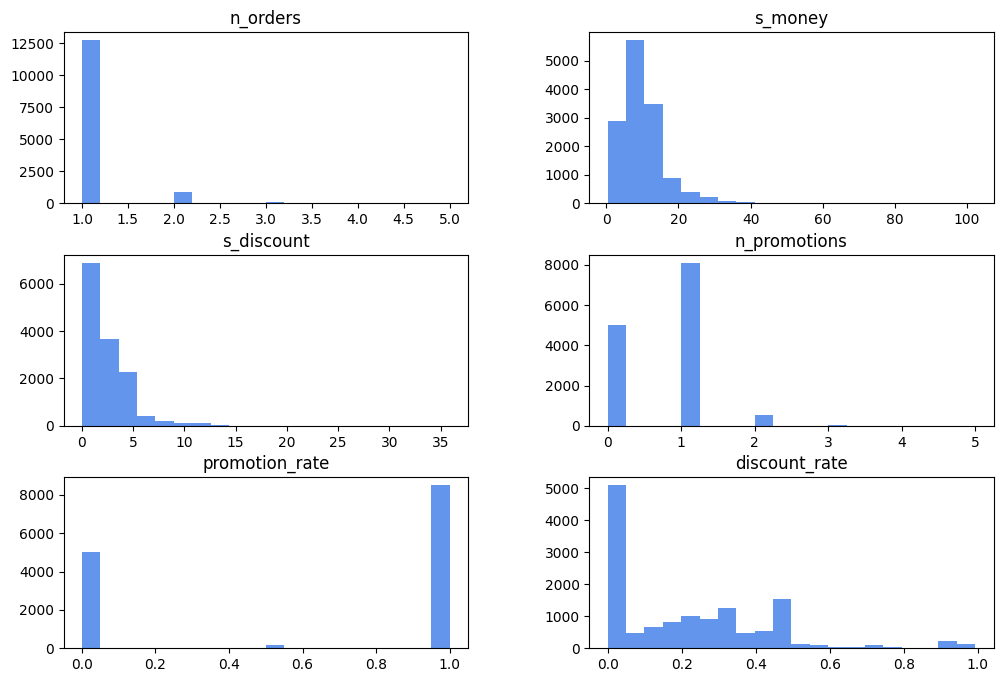

In [411]:
df_sr_0_metric.iloc[:, 1:].hist(figsize=(12, 8), grid=False, color='cornflowerblue', bins=20)
plt.show()

- Khách hàng bị lỗi gì mà failed 1 lần và dừng luôn, không thử lại?

In [412]:
# Detail error
df_error_0 = (
    df_join_all[(df_join_all['status_id'] != 1) & (df_join_all['customer_id'].isin(list_sr_0))]
    .groupby(['year_month', 'description'])
    .agg(n_orders = ('ticket_id', 'count'))
    .sort_values(by='year_month')
    .reset_index()
)

df_error_0.head()

,year_month,description,n_orders
0,2019-01,Insufficient funds in customer account. Please add more funds and try the transaction again.,196
1,2019-01,No response from your bank,206
2,2019-01,Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.,49
3,2019-01,Payment failed from bank,114
4,2019-01,Payment overdue,16


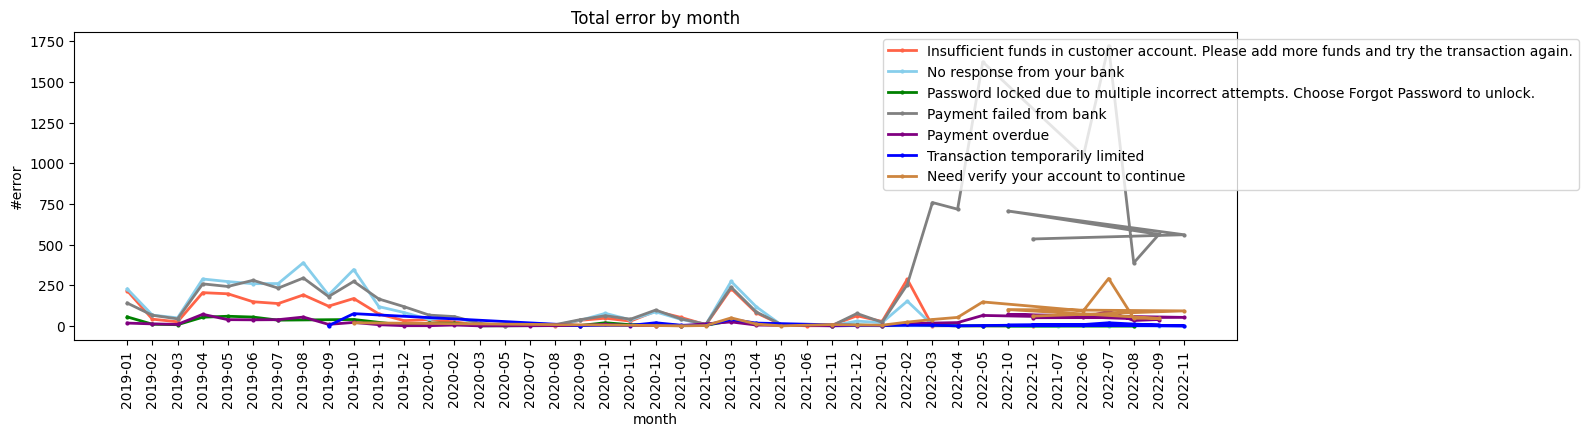

In [413]:
error_color_pairs = [('Insufficient funds in customer account. Please add more funds and try the transaction again.', 'tomato'),
                     ('No response from your bank', 'skyblue'),
                     ('Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.', 'green'),
                     ('Payment failed from bank', 'gray'),
                     ('Payment overdue', 'purple'),
                     ('Transaction temporarily limited', 'blue'),
                     ('Need verify your account to continue', 'peru')]

plt.figure(figsize=(15, 4))
for error, color in error_color_pairs:
    df_err_line = df_error[df_error['description'] == error]
    plt.plot(df_err_line['year_month'], df_err_line['n_ords'], label=error, marker='o', color=color, linewidth=2, markersize=2)
    
plt.title('Total error by month')
plt.xlabel('month')
plt.ylabel('#error')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation=90)
plt.show()

*Note
- Nhóm bị lỗi này gần như cũng là nhóm bị lỗi cuả toàn bộ khách hàng (xem lại 2 chart hist)
- Lí do lỗi:
    + Lỗi bên bank và họ không chủ động được nữa
    + Lỗi định danh tài khoản -> nghi ngờ gian lận hoặc không đủ điều kiện để upgrade level tài khoản